In [1]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon, sem
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product
import pingouin as pg
from brokenaxes import brokenaxes

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LIGHT_LASER=  '#8CB1F3'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
#PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#V1
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']#V2

#retroanimals = ['PB_86','BS_86','PB_92','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165']
did_learn_animals = ['BS_92','BS_103','BS_111','BS_179']
did_not_learn_animals = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
indeterminate_animals = ['BS_139','BS_165','BS_191','BS_192']

ephys_animals = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']
sham_1_animals = ['AE_267','AO_273','AE_312']
sham_2_animals = ['AE_287']
opsin_control_animals = np.concatenate((sham_1_animals,sham_2_animals))
# opsin_control_animals = ephys_animals
# opsin_control_animals = np.concatenate((sham_1_animals,sham_2_animals))
opsin_control_animals = opsin_control_animals = np.concatenate(([['BS_42','BS_108','BS_56','BS_72','BS_70','BS_87'],['AE_312']]))

all_opsin_animals = np.concatenate((did_learn_animals,did_not_learn_animals,indeterminate_animals))

#act_directory = 'D:\\Analysis_Cache_archived_Oct_27_2022'
#act_directory = 'D:\\Opsin_Cache'
act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

stim25sdecodingfilename = 'D:\\stimdecoding_25s.csv'
passivedecodingfilename = 'D:\\stimdecoding_25s_passive.csv'
choicedecodingfilename = 'D:\\choicedecoding.csv'
opsindecodingfilename = 'D:\\stimdecoding_25s_opsin.csv'
opsinondecodingfilename = 'D:\\stimdecoding_25s_opsin_on.csv'
opsinoffdecodingfilename = 'D:\\stimdecoding_25s_opsin_off.csv'
copsindecodingfilename = 'D:\\choicedecoding_opsin_all.csv'
copsinondecodingfilename = 'D:\\choicedecoding_opsin_on.csv'
copsinoffdecodingfilename = 'D:\\choicedecoding_opsin_off.csv'

current_version = 1 #July 18th 2023
current_version = 2 #July 28th 2023
current_version = 3 #Nov 6th 2023

stdfont = 14
stdyfrac = 0.06

In [2]:
animals = did_not_learn_animals

In [3]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching 

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Fetching files for DS_22
Fetching files for DS_23
Fetching files for DS_24
Fetching files for DS_27
Fetching files for DS_28
Fetching files for DS_13
Fetching files for BS_173
Fetching files for BS_175
Fetching files for BS_187
Fetching files for BS_188
Fetching files for BS_213
Fetching files for BS_214
Fetching files for TH_217
Fetching files for AE_235
Fetching files for AE_236
Fetching files for TH_237
Fetching files for AE_252
Fetching files for AE_254
Fetching files for AE_238
Fetching files for AE_239
Fetching files for AE_240
Fetching files for AE_267
Fetching files for AO_273
Fetching files for AO_274
Fetching files for AE_287
Fetching files for AE_301
Fetching files for AE_312
P:\Behavioor\BS_61\behavior\BS_61_42v2_reversal.txt: No columns to parse from file
P:\Behavioor\BS_103\behavior\BS_103_11v4_opto.txt: No columns to parse from file
Error loading P:\Behavioor\BS_123\behavior\BS_123_18v1_opto.txt: No columns to parse from file
P:\Behavioor\BS_123\behavior\BS_123_18v1_opto

../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scala

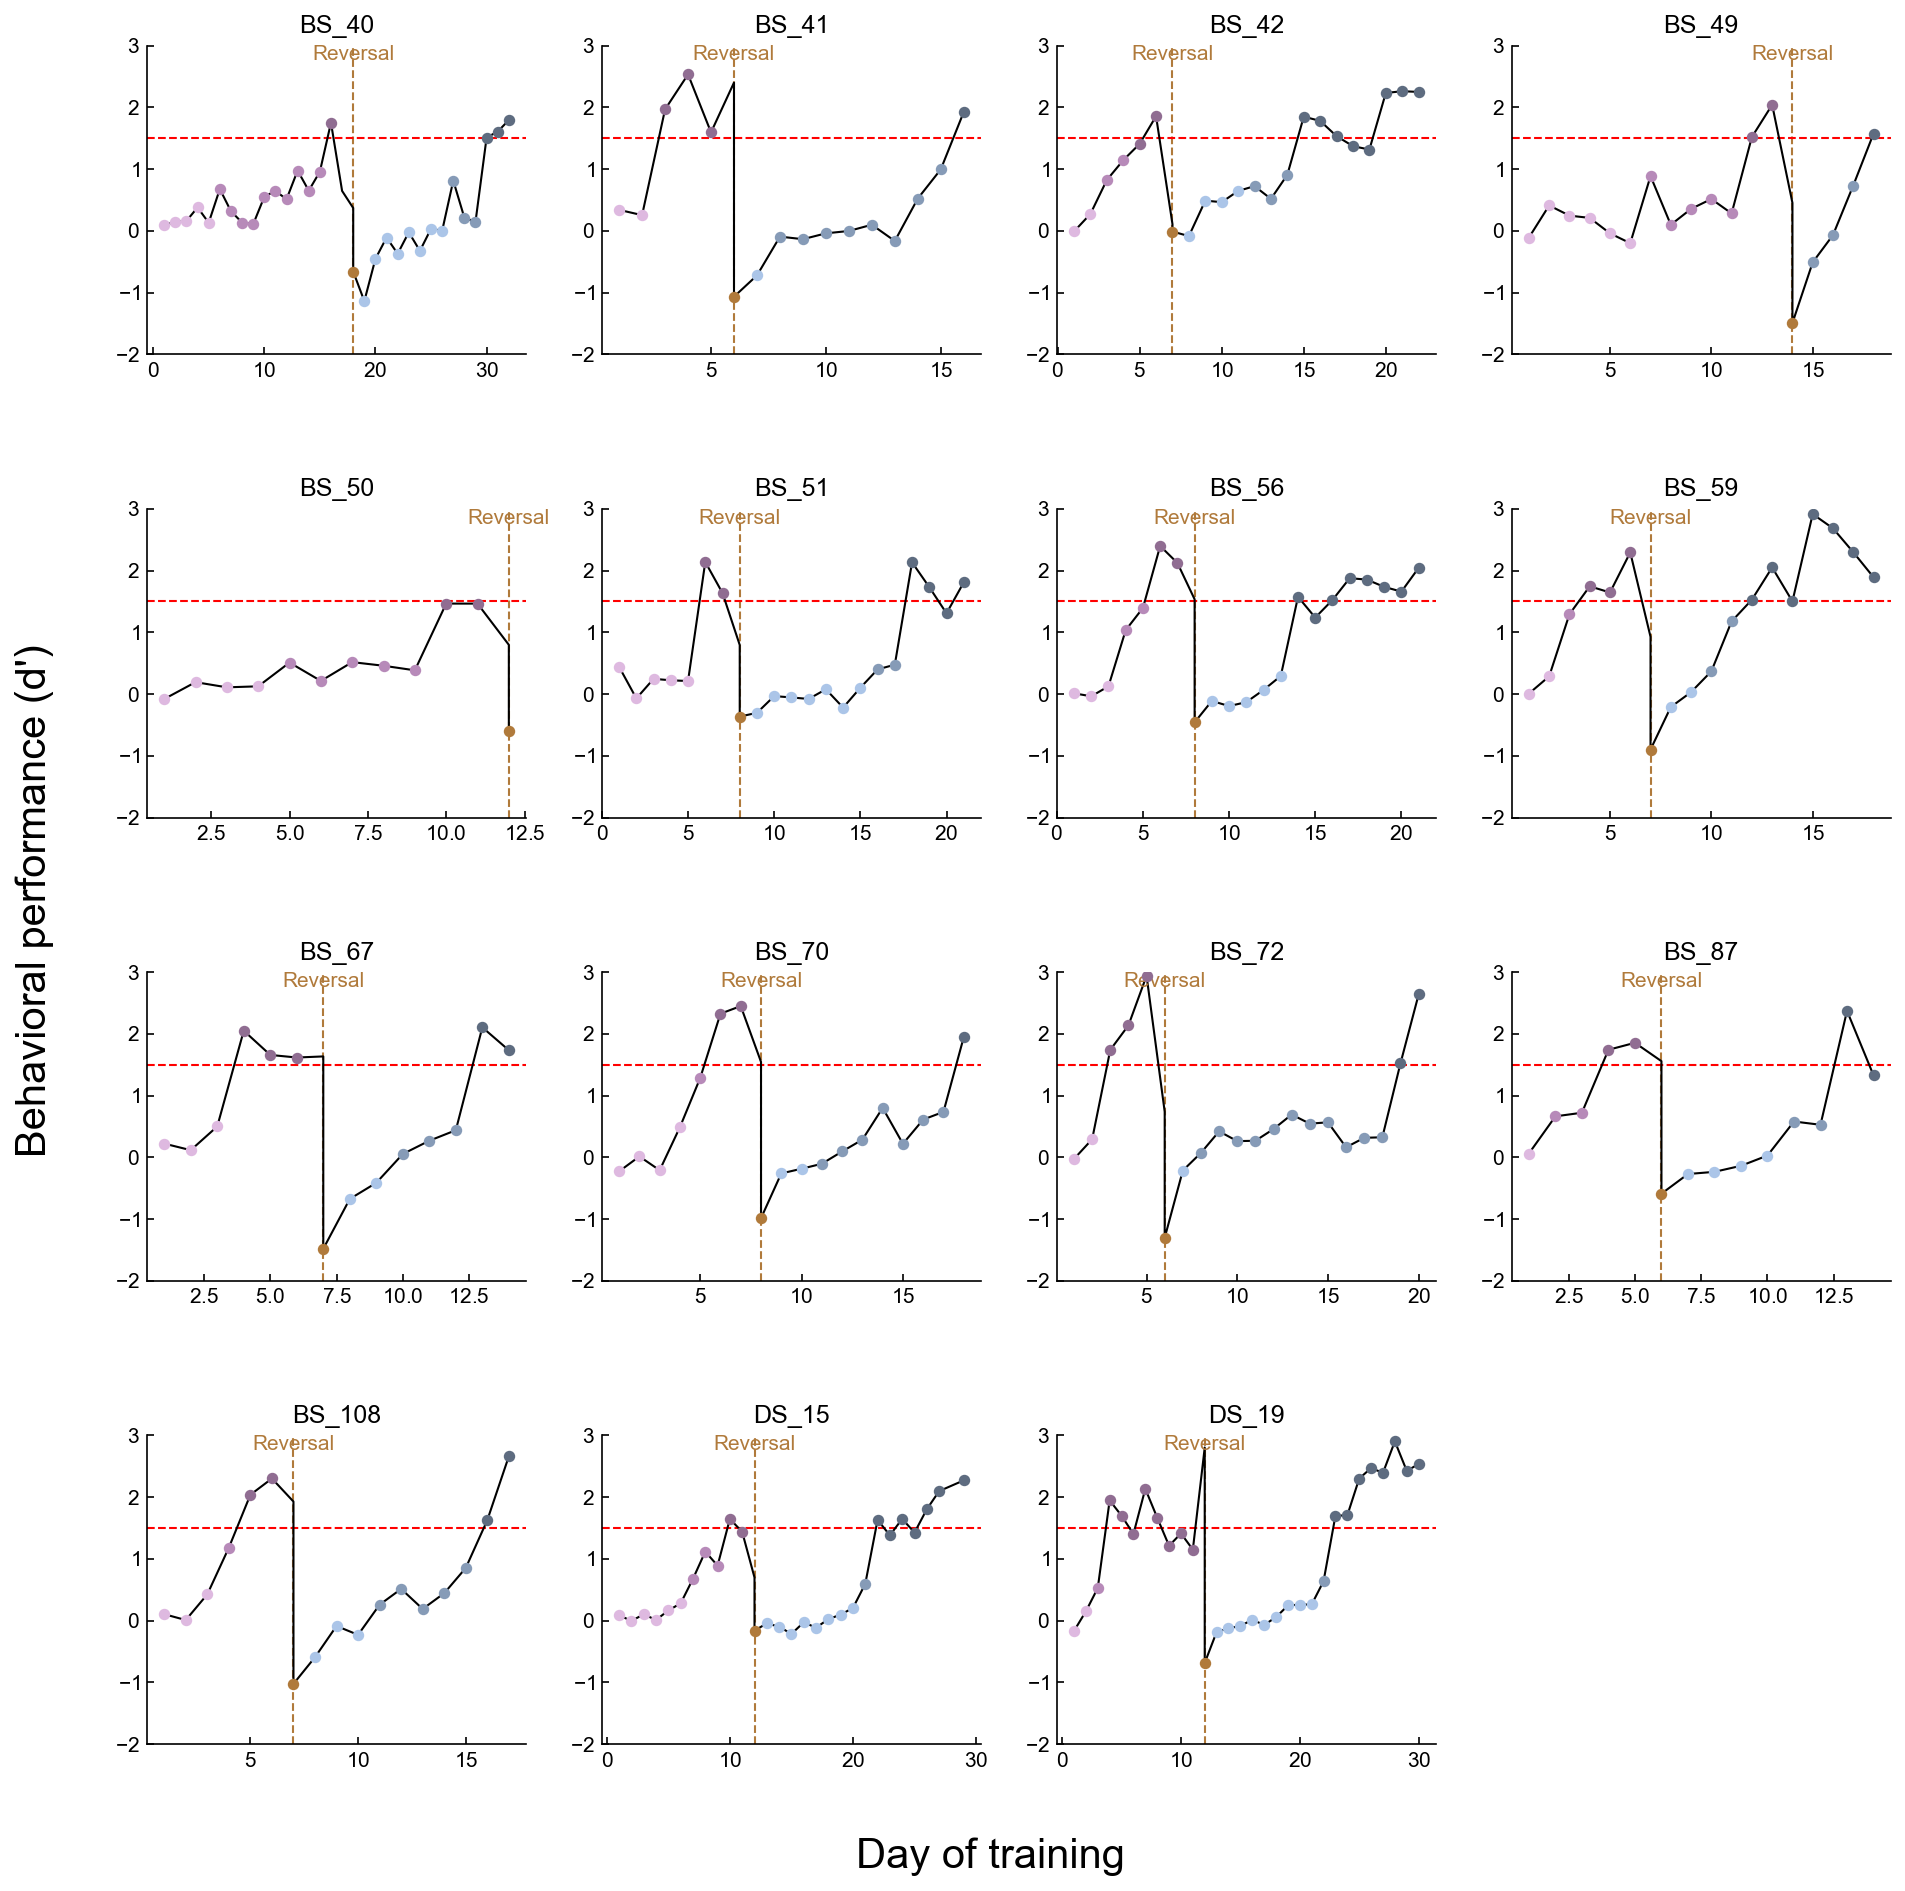

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


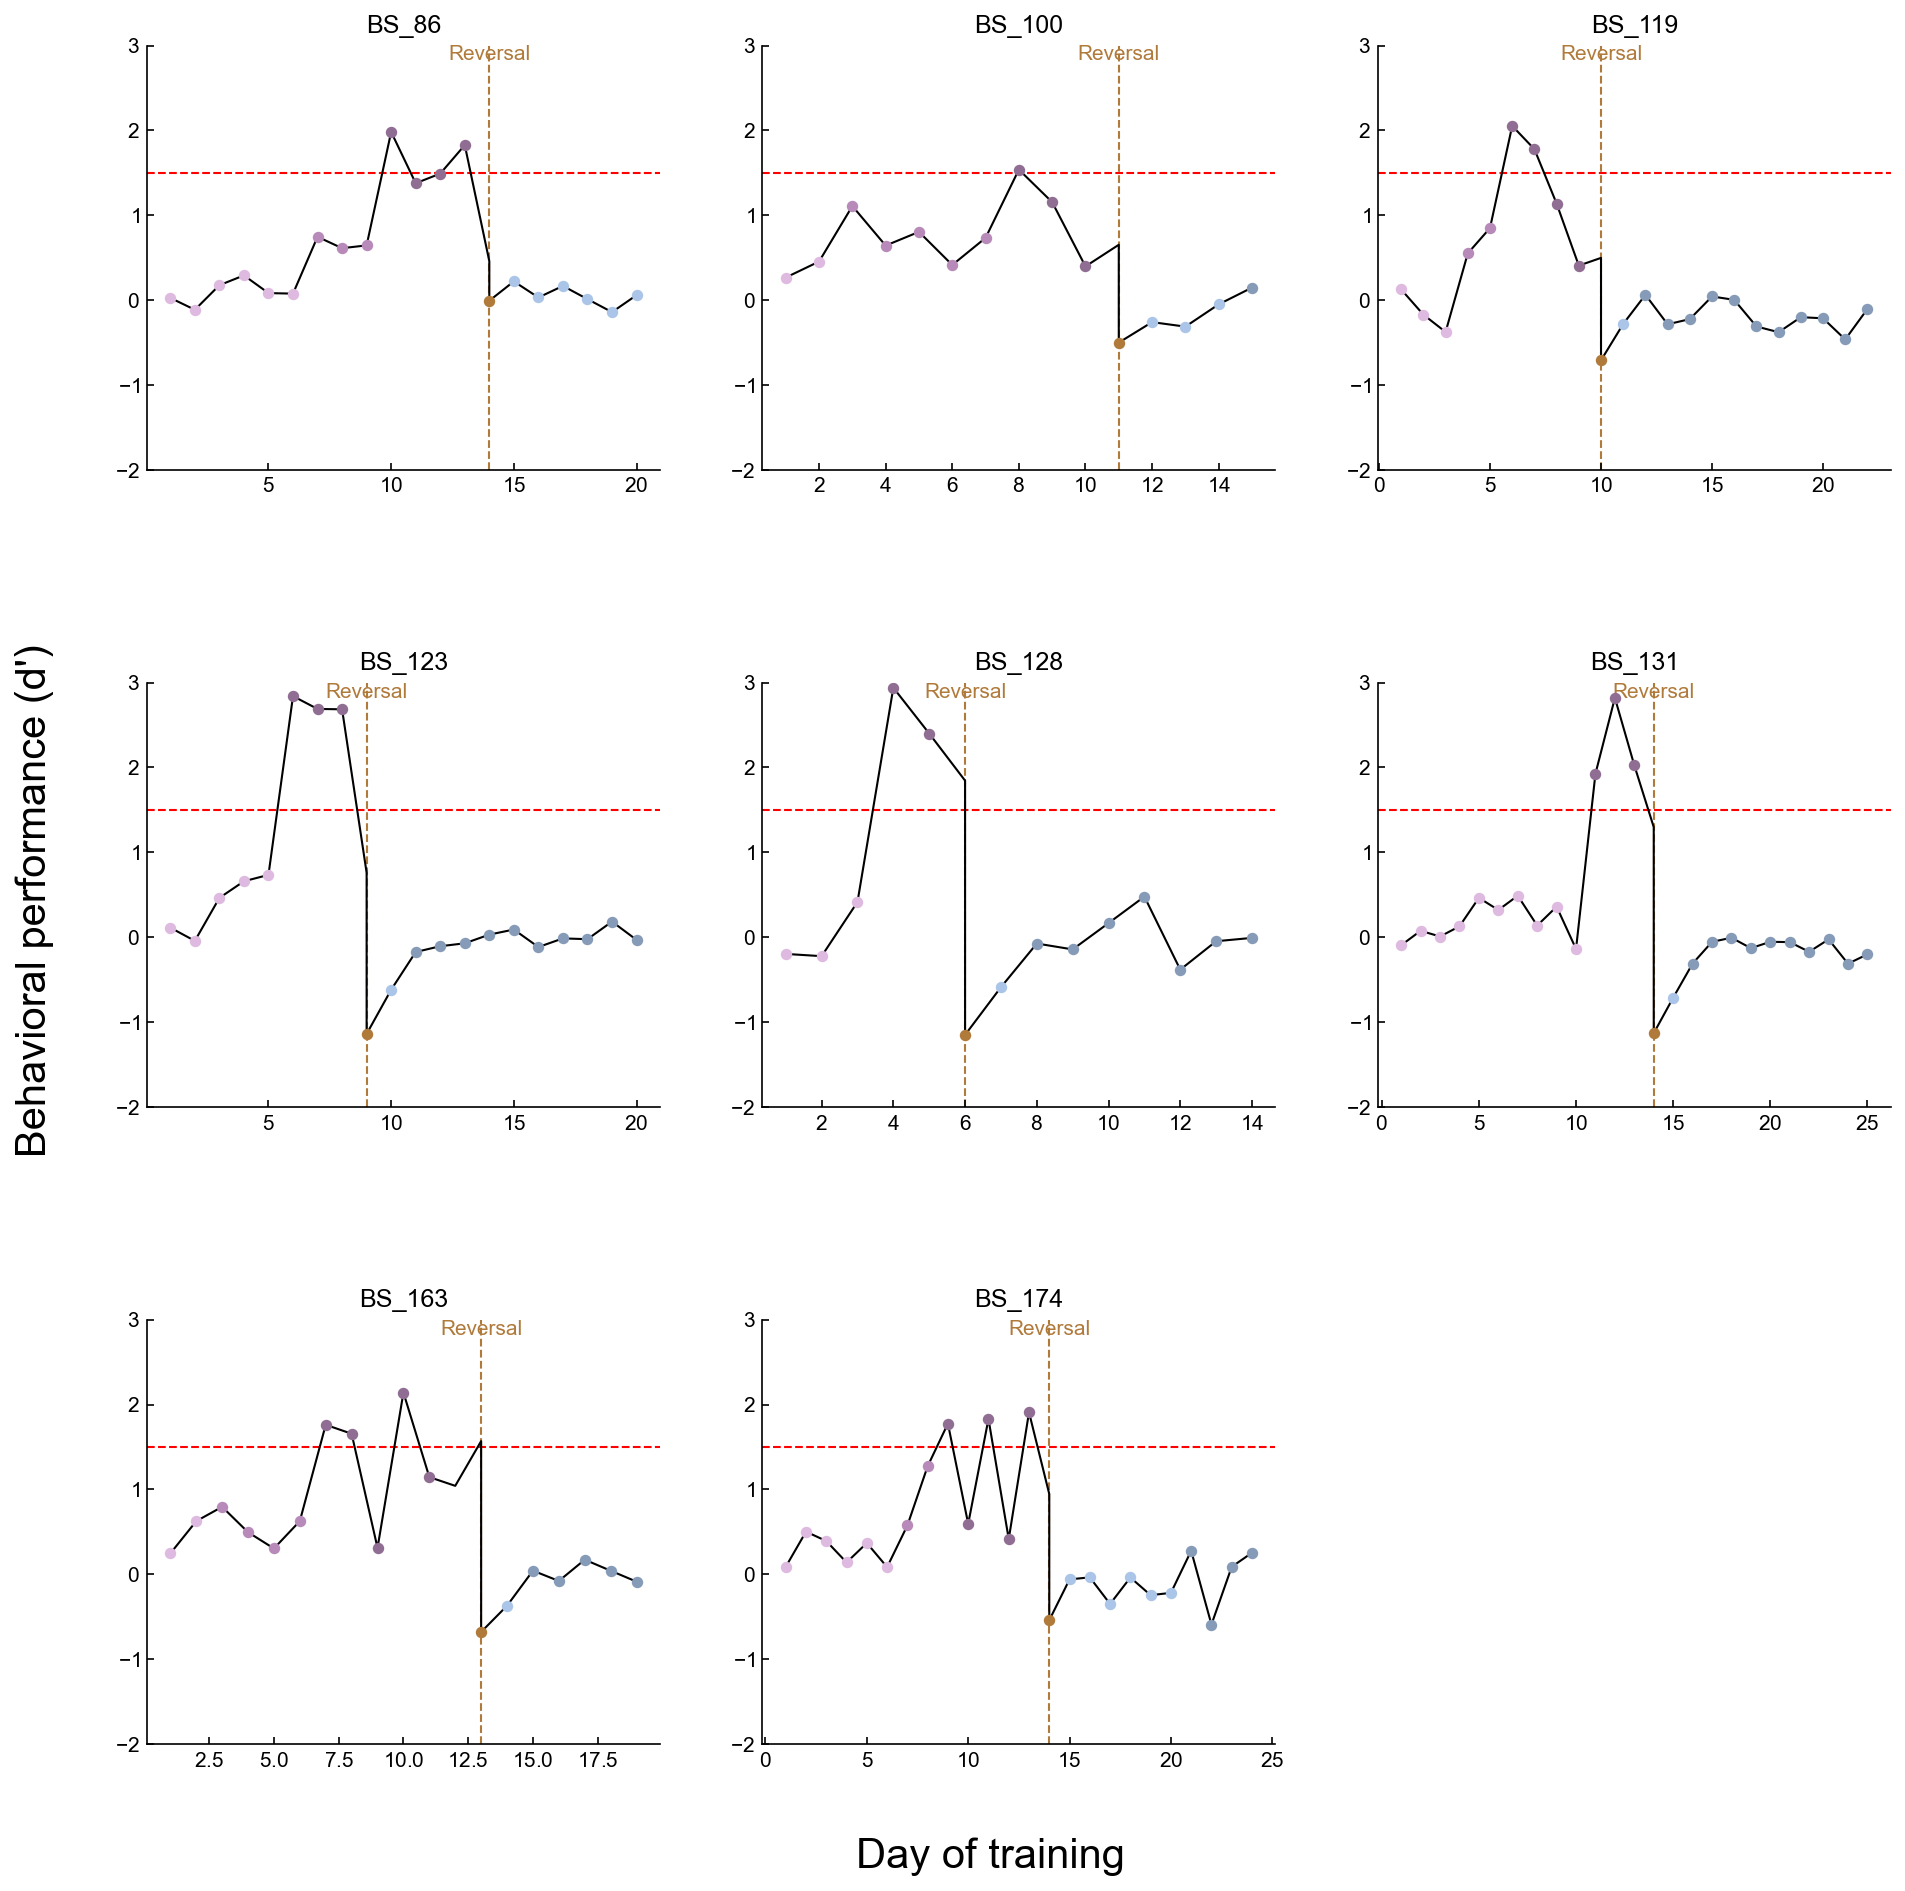

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


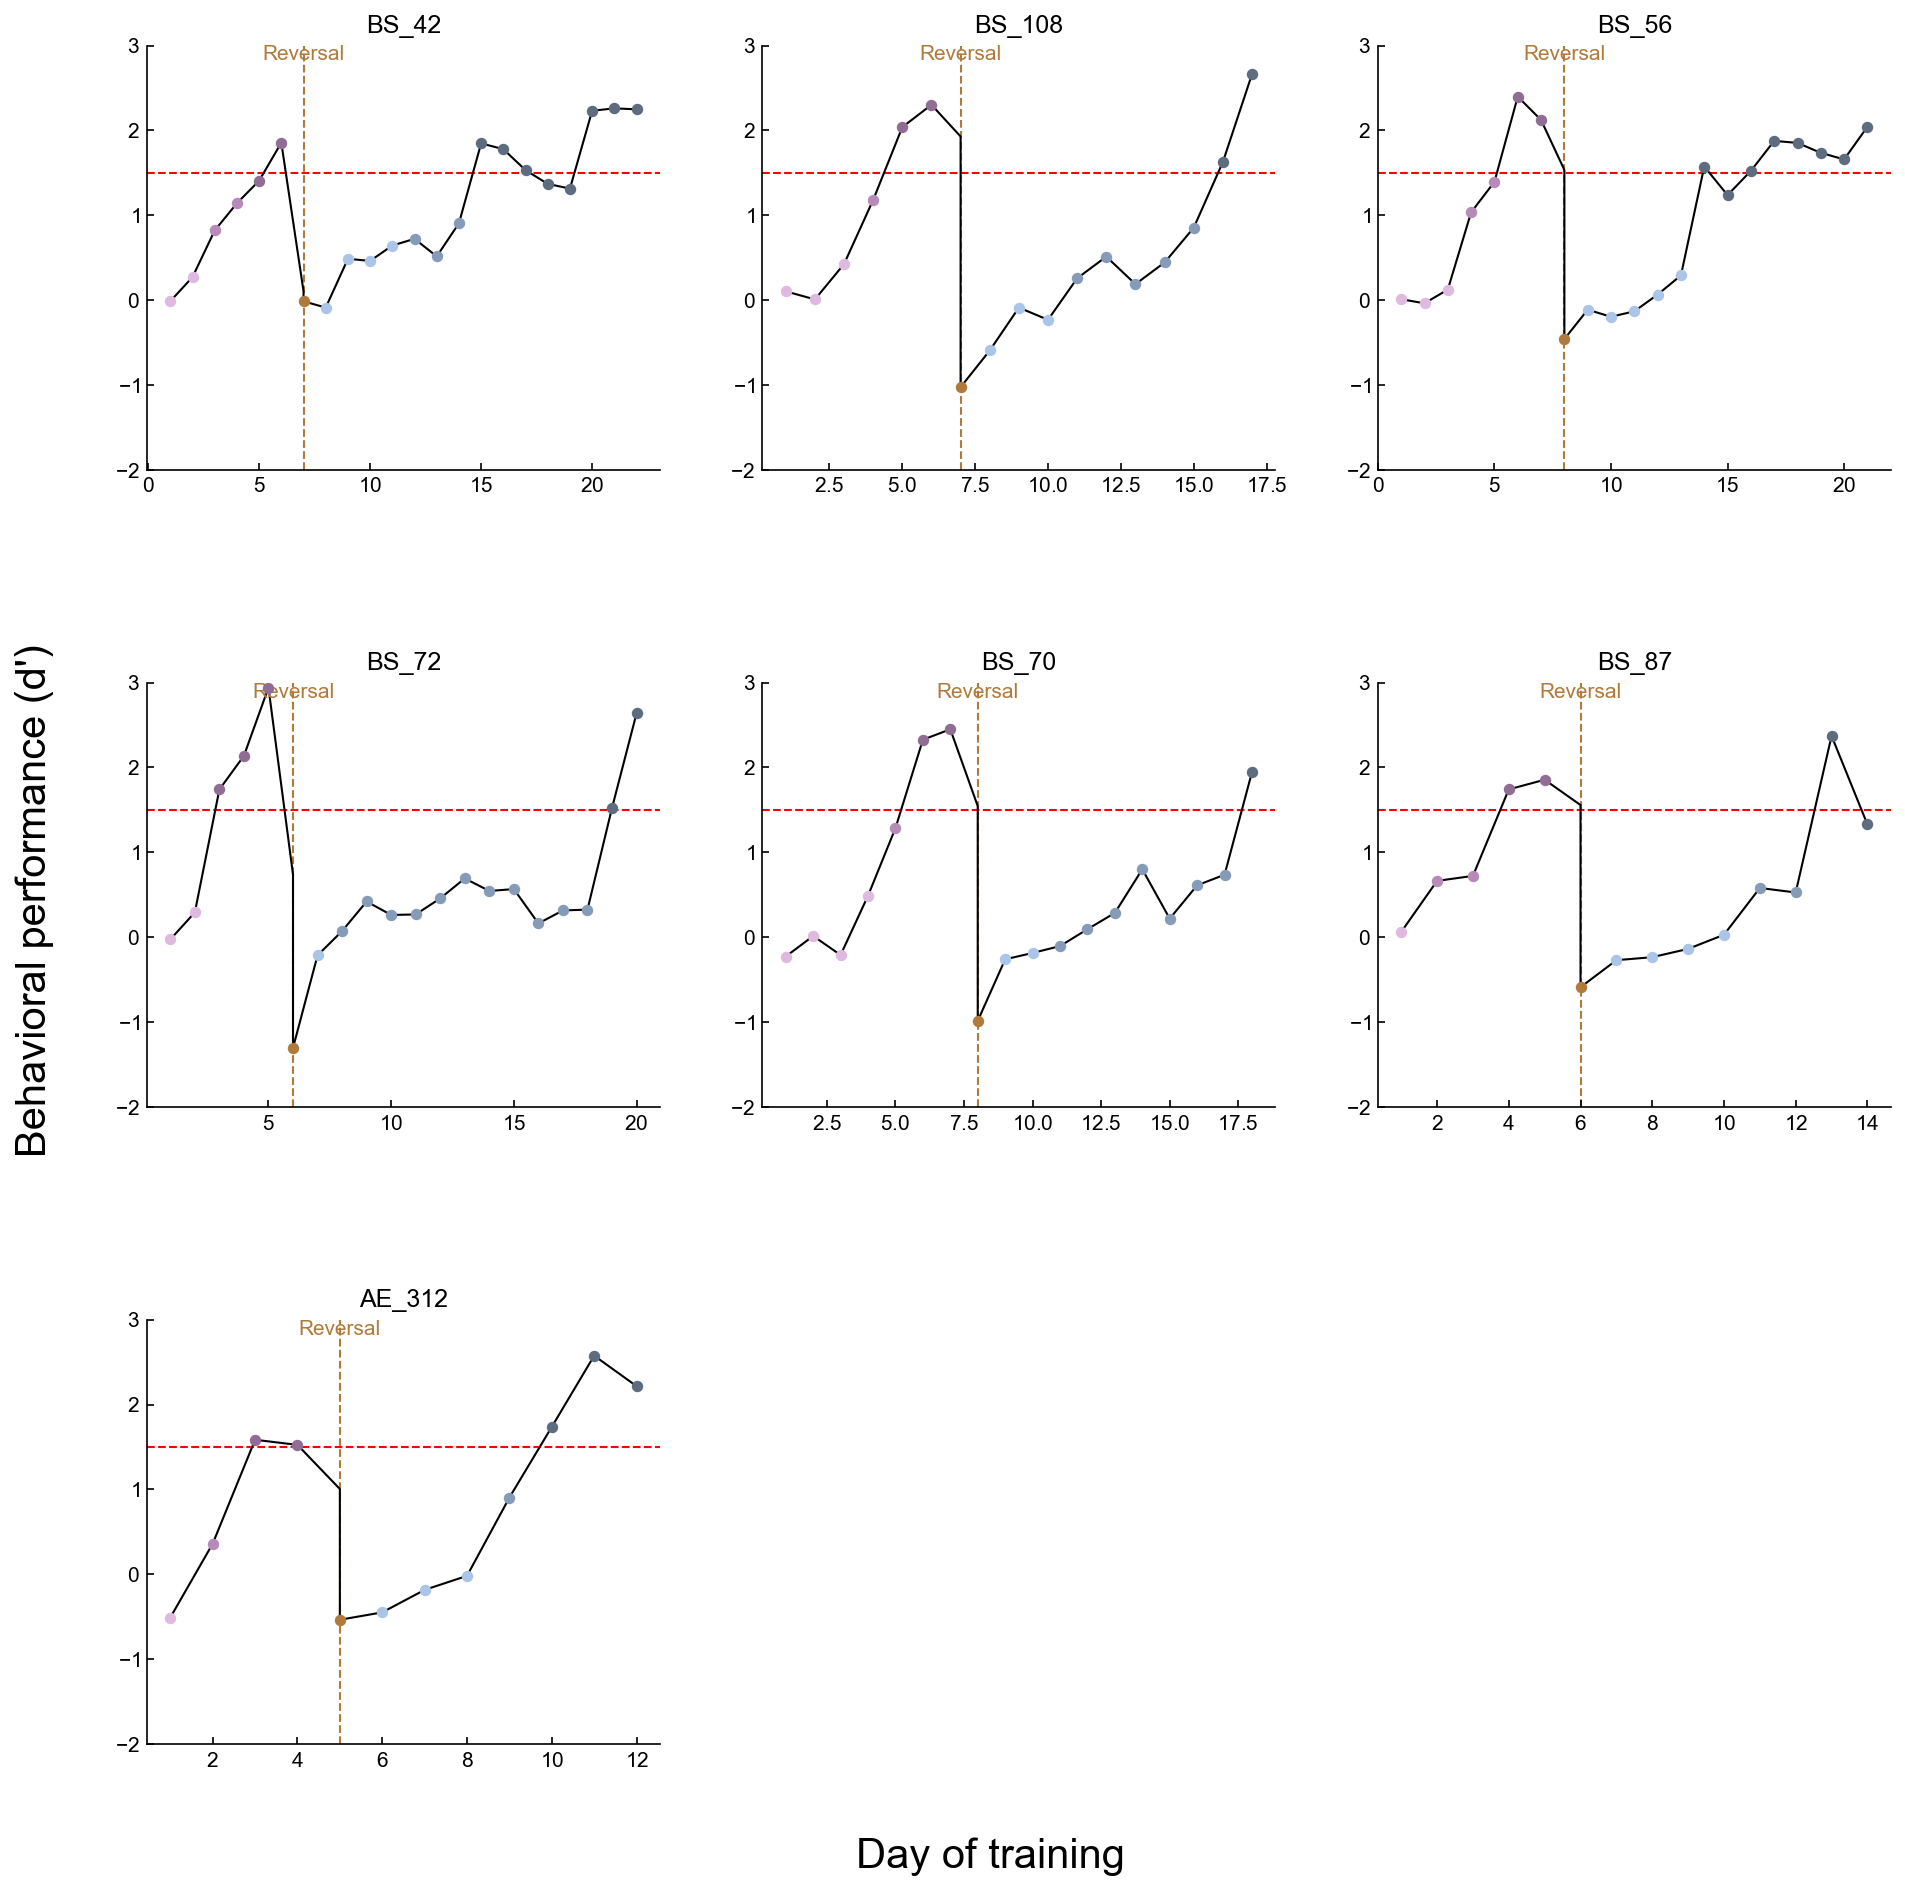

In [4]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(ephys_animals,animalBehaviors,plot=True,noTrim=False)
learning_phases2,_,_ = ilep.calculateLearningPhasesV2(did_not_learn_animals,animalBehaviors,plot=True,noTrim=False,noTrimPost=True)
learning_phases3,_,_ = ilep.calculateLearningPhasesV2(opsin_control_animals,animalBehaviors,plot=True,noTrim=False)
for d in learning_phases2:
    learning_phases[d] = learning_phases2[d]
for d in learning_phases3:
    learning_phases[d] = learning_phases3[d]

In [5]:
EnumSessionOps = []
EnumClustOps = []
sessions = os.listdir(ops_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    if sessionfile.meta.region != 'AC':
        continue
    if sessionfile.meta.task not in ['opto nonreversal','opto switch','opto reversal']:
        continue
        
    if sessionfile.meta.animal not in did_not_learn_animals:
        continue

    if hasattr(animalBehaviors[sessionfile.meta.animal],'cloudiness') and sessionfile.meta.day_of_training >= animalBehaviors[sessionfile.meta.animal].cloudiness:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSessionOps.append(session)
        EnumClustOps.append(clust)

100%|██████████| 167/167 [00:02<00:00, 63.12it/s]


In [6]:
EILphasesOps = np.full_like(EnumSessionOps,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSessionOps)):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        day_after_reversal = day - animalBehaviors[animal].reversal
            
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphasesOps[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphasesOps[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphasesOps[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphasesOps[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day_after_reversal <= 2:
            EILphasesOps[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day_after_reversal <= 4:
            EILphasesOps[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day_after_reversal >= 5:
            EILphasesOps[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 902/902 [00:23<00:00, 38.25it/s] 

errors for: []


# Load Decoding Data

In [7]:
stim_25s_df = pd.read_csv(stim25sdecodingfilename)
passive_df = pd.read_csv(passivedecodingfilename)
choice_df = pd.read_csv(choicedecodingfilename)
opsin_df = pd.read_csv(opsindecodingfilename)
opsinon_df = pd.read_csv(opsinondecodingfilename)
opsinoff_df = pd.read_csv(opsinoffdecodingfilename)
copsin_df = pd.read_csv(copsindecodingfilename)
copsinon_df = pd.read_csv(copsinondecodingfilename)
copsinoff_df = pd.read_csv(copsinoffdecodingfilename)
dec_df = pd.concat([stim_25s_df,choice_df,passive_df,opsin_df,opsinon_df,opsinoff_df,copsin_df,copsinon_df,copsinoff_df])

def getDataPoint(df,session,clust,categories,column):
    df = df[df['session']==session]
    df = df[df['clust']==clust]
    df = df[df['categories']==categories]
    val = list(df[column])
    if len(val) == 1:
        return val[0]
    elif len(val) <= 0:
        return np.nan
    else:
        raise Exception('Incorrent length. Duplicate values')

In [8]:
stim_acc = []
stim_acc_s = []
choice_acc_s = []
pval_stim_s = []
for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionOps,EnumClustOps))):
    stim_accuracy = getDataPoint(dec_df,session,clust,'stimulus_on','weighted_accuracy')
    pvalue_stim_s = getDataPoint(dec_df,session,clust,'stimulus_on','pval_synthetic_control')
    stim_acc.append(stim_accuracy)
    pval_stim_s.append(pvalue_stim_s)
stim_acc = np.array(stim_acc)
pval_stim_s = np.array(pval_stim_s)

def get_TE_mask(acc,pval_s,pval_c):
    low_decoders = np.less(acc,0.5)
    low_accuracies = acc[low_decoders]
    low_magnitudes = np.absolute(low_accuracies-0.5)

    low_magnitudes = np.sort(low_magnitudes)
    task_encoder_threshold = 0.5+low_magnitudes[int(0.95 * len(low_magnitudes))]
    print('Task encoder threshold: '+str(task_encoder_threshold))

    is_finite = np.isfinite(acc)
    is_valid_pval = np.less(pval_s,0.05) #np.less(pval_c,0.05))
    is_TE = np.greater_equal(acc,task_encoder_threshold)
    is_TE = np.logical_and(is_TE,is_finite)
    is_TE = np.logical_and(is_TE,is_valid_pval)
    return is_TE,task_encoder_threshold

is_TE_Ops,task_encoder_threshold_Ops = get_TE_mask(stim_acc,pval_stim_s,None)

902it [00:03, 288.85it/s]

Task encoder threshold: 0.5855125094850949


In [9]:
len(EnumSessionOps)

902

In [10]:
FRmod_preearly = []
FRmod_prelate = []
FRmod_preexpert = []
FRmod_postearly = []
FRmod_postlate = []
FRmod_postexpert = []

FRmod_On_preearly = []
FRmod_On_prelate = []
FRmod_On_preexpert = []
FRmod_On_postearly = []
FRmod_On_postlate = []
FRmod_On_postexpert = []

FRmod_Off_preearly = []
FRmod_Off_prelate = []
FRmod_Off_preexpert = []
FRmod_Off_postearly = []
FRmod_Off_postlate = []
FRmod_Off_postexpert = []

ChoiceMod_preearly = []
ChoiceMod_prelate = []
ChoiceMod_preexpert = []
ChoiceMod_postearly = []
ChoiceMod_postlate = []
ChoiceMod_postexpert = []

ChoiceMod_On_preearly = []
ChoiceMod_On_prelate = []
ChoiceMod_On_preexpert = []
ChoiceMod_On_postearly = []
ChoiceMod_On_postlate = []
ChoiceMod_On_postexpert = []

ChoiceMod_Off_preearly = []
ChoiceMod_Off_prelate = []
ChoiceMod_Off_preexpert = []
ChoiceMod_Off_postearly = []
ChoiceMod_Off_postlate = []
ChoiceMod_Off_postexpert = []

Stim_Dec_preearly = []
Stim_Dec_prelate = []
Stim_Dec_preexpert = []
Stim_Dec_postearly = []
Stim_Dec_postlate = []
Stim_Dec_postexpert = []

Stim_On_Dec_preearly = []
Stim_On_Dec_prelate = []
Stim_On_Dec_preexpert = []
Stim_On_Dec_postearly = []
Stim_On_Dec_postlate = []
Stim_On_Dec_postexpert = []

Stim_On_CR_Dec_preearly = []
Stim_On_CR_Dec_prelate = []
Stim_On_CR_Dec_preexpert = []
Stim_On_CR_Dec_postearly = []
Stim_On_CR_Dec_postlate = []
Stim_On_CR_Dec_postexpert = []

Stim_On_NCR_Dec_preearly = []
Stim_On_NCR_Dec_prelate = []
Stim_On_NCR_Dec_preexpert = []
Stim_On_NCR_Dec_postearly = []
Stim_On_NCR_Dec_postlate = []
Stim_On_NCR_Dec_postexpert = []

Stim_Off_Dec_preearly = []
Stim_Off_Dec_prelate = []
Stim_Off_Dec_preexpert = []
Stim_Off_Dec_postearly = []
Stim_Off_Dec_postlate = []
Stim_Off_Dec_postexpert = []

Choice_Dec_preearly = []
Choice_Dec_prelate = []
Choice_Dec_preexpert = []
Choice_Dec_postearly = []
Choice_Dec_postlate = []
Choice_Dec_postexpert = []

Choice_On_Dec_preearly = []
Choice_On_Dec_prelate = []
Choice_On_Dec_preexpert = []
Choice_On_Dec_postearly = []
Choice_On_Dec_postlate = []
Choice_On_Dec_postexpert = []

Choice_Off_Dec_preearly = []
Choice_Off_Dec_prelate = []
Choice_Off_Dec_preexpert = []
Choice_Off_Dec_postearly = []
Choice_Off_Dec_postlate = []
Choice_Off_Dec_postexpert = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionOps,EnumClustOps))):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
#     if not is_TE_Ops[idx]:
#         continue
    
    try:
        FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
        FRmod_On = sessionfile.responsiveness[clust]['laser_on'].FRmodulation
        FRmod_Off = sessionfile.responsiveness[clust]['laser_off'].FRmodulation
        ChoiceMod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation_choice
        ChoiceMod_On = sessionfile.responsiveness[clust]['laser_on'].FRmodulation_choice
        ChoiceMod_Off = sessionfile.responsiveness[clust]['laser_off'].FRmodulation_choice
    except Exception as e:
        print(e)
        FRmod = np.nan
        FRmod_On = np.nan
        FRmod_Off = np.nan
        ChoiceMod = np.nan
        ChoiceMod_On = np.nan
        ChoiceMod_Off = np.nan
    
    stim_acc = getDataPoint(dec_df,session,clust,'stimulus','weighted_accuracy')
    stim_acc_on = getDataPoint(dec_df,session,clust,'stimulus_on','weighted_accuracy')
    stim_acc_off = getDataPoint(dec_df,session,clust,'stimulus_off','weighted_accuracy')
    choice_acc = getDataPoint(dec_df,session,clust,'response','weighted_accuracy')
    choice_acc_on = getDataPoint(dec_df,session,clust,'response_on','weighted_accuracy')
    choice_acc_off = getDataPoint(dec_df,session,clust,'response_off','weighted_accuracy')
    if getDataPoint(dec_df,session,clust,'stimulus','pval_synthetic_control') > 0.05:
        stim_acc = np.nan
    if getDataPoint(dec_df,session,clust,'stimulus_on','pval_synthetic_control') > 0.05:
        stim_acc_on = np.nan
    if getDataPoint(dec_df,session,clust,'stimulus_off','pval_synthetic_control') > 0.05:
        stim_acc_off = np.nan
    if getDataPoint(dec_df,session,clust,'response','pval_synthetic_control') > 0.05:
        choice_acc = np.nan
    if getDataPoint(dec_df,session,clust,'response_on','pval_synthetic_control') > 0.05:
        choice_acc_on = np.nan
    if getDataPoint(dec_df,session,clust,'response_off','pval_synthetic_control') > 0.05:
        choice_acc_off = np.nan
        
    if EILphasesOps[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
    
    if EILphasesOps[idx] == 'pre early':
        FRmod_preearly.append(FRmod)
        FRmod_On_preearly.append(FRmod_On)
        FRmod_Off_preearly.append(FRmod_Off)
        ChoiceMod_preearly.append(ChoiceMod)
        ChoiceMod_On_preearly.append(ChoiceMod_On)
        ChoiceMod_Off_preearly.append(ChoiceMod_Off)
        Stim_Dec_preearly.append(stim_acc)
        Stim_On_Dec_preearly.append(stim_acc_on)
        Stim_Off_Dec_preearly.append(stim_acc_off)
        Choice_Dec_preearly.append(choice_acc)
        Choice_On_Dec_preearly.append(choice_acc_on)
        Choice_Off_Dec_preearly.append(choice_acc_off)
        if FRmod >= 3.5:
            Stim_On_CR_Dec_preearly.append(stim_acc_on)
        elif FRmod < 3.5:
            Stim_On_NCR_Dec_preearly.append(stim_acc_on)
    elif EILphasesOps[idx] == 'pre late':
        FRmod_prelate.append(FRmod)
        FRmod_On_prelate.append(FRmod_On)
        FRmod_Off_prelate.append(FRmod_Off)
        ChoiceMod_prelate.append(ChoiceMod)
        ChoiceMod_On_prelate.append(ChoiceMod_On)
        ChoiceMod_Off_prelate.append(ChoiceMod_Off)
        Stim_Dec_prelate.append(stim_acc)
        Stim_On_Dec_prelate.append(stim_acc_on)
        Stim_Off_Dec_prelate.append(stim_acc_off)
        Choice_Dec_prelate.append(choice_acc)
        Choice_On_Dec_prelate.append(choice_acc_on)
        Choice_Off_Dec_prelate.append(choice_acc_off)
        if FRmod >= 3.5:
            Stim_On_CR_Dec_prelate.append(stim_acc_on)
        elif FRmod < 3.5:
            Stim_On_NCR_Dec_prelate.append(stim_acc_on)
    elif EILphasesOps[idx] == 'pre expert':
        FRmod_preexpert.append(FRmod)
        FRmod_On_preexpert.append(FRmod_On)
        FRmod_Off_preexpert.append(FRmod_Off)
        ChoiceMod_preexpert.append(ChoiceMod)
        ChoiceMod_On_preexpert.append(ChoiceMod_On)
        ChoiceMod_Off_preexpert.append(ChoiceMod_Off)
        Stim_Dec_preexpert.append(stim_acc)
        Stim_On_Dec_preexpert.append(stim_acc_on)
        Stim_Off_Dec_preexpert.append(stim_acc_off)
        Choice_Dec_preexpert.append(choice_acc)
        Choice_On_Dec_preexpert.append(choice_acc_on)
        Choice_Off_Dec_preexpert.append(choice_acc_off)
        if FRmod >= 3.5:
            Stim_On_CR_Dec_preexpert.append(stim_acc_on)
        elif FRmod < 3.5:
            Stim_On_NCR_Dec_preexpert.append(stim_acc_on)
    elif EILphasesOps[idx] == 'post early':
        FRmod_postearly.append(FRmod)
        FRmod_On_postearly.append(FRmod_On)
        FRmod_Off_postearly.append(FRmod_Off)
        ChoiceMod_postearly.append(ChoiceMod)
        ChoiceMod_On_postearly.append(ChoiceMod_On)
        ChoiceMod_Off_postearly.append(ChoiceMod_Off)
        Stim_Dec_postearly.append(stim_acc)
        Stim_On_Dec_postearly.append(stim_acc_on)
        Stim_Off_Dec_postearly.append(stim_acc_off)
        Choice_Dec_postearly.append(choice_acc)
        Choice_On_Dec_postearly.append(choice_acc_on)
        Choice_Off_Dec_postearly.append(choice_acc_off)
        if FRmod >= 3.5:
            Stim_On_CR_Dec_postearly.append(stim_acc_on)
        elif FRmod < 3.5:
            Stim_On_NCR_Dec_postearly.append(stim_acc_on)
    elif EILphasesOps[idx] == 'post late':
        FRmod_postlate.append(FRmod)
        FRmod_On_postlate.append(FRmod_On)
        FRmod_Off_postlate.append(FRmod_Off)
        ChoiceMod_postlate.append(ChoiceMod)
        ChoiceMod_On_postlate.append(ChoiceMod_On)
        ChoiceMod_Off_postlate.append(ChoiceMod_Off)
        Stim_Dec_postlate.append(stim_acc)
        Stim_On_Dec_postlate.append(stim_acc_on)
        Stim_Off_Dec_postlate.append(stim_acc_off)
        Choice_Dec_postlate.append(choice_acc)
        Choice_On_Dec_postlate.append(choice_acc_on)
        Choice_Off_Dec_postlate.append(choice_acc_off)
        if FRmod >= 3.5:
            Stim_On_CR_Dec_postlate.append(stim_acc_on)
        elif FRmod < 3.5:
            Stim_On_NCR_Dec_postlate.append(stim_acc_on)
    elif EILphasesOps[idx] == 'post expert':
        FRmod_postexpert.append(FRmod)
        FRmod_On_postexpert.append(FRmod_On)
        FRmod_Off_postexpert.append(FRmod_Off)
        ChoiceMod_postexpert.append(ChoiceMod)
        ChoiceMod_On_postexpert.append(ChoiceMod_On)
        ChoiceMod_Off_postexpert.append(ChoiceMod_Off)
        Stim_Dec_postexpert.append(stim_acc)
        Stim_On_Dec_postexpert.append(stim_acc_on)
        Stim_Off_Dec_postexpert.append(stim_acc_off)
        Choice_Dec_postexpert.append(choice_acc)
        Choice_On_Dec_postexpert.append(choice_acc_on)
        Choice_Off_Dec_postexpert.append(choice_acc_off)
        if FRmod >= 3.5:
            Stim_On_CR_Dec_postexpert.append(stim_acc_on)
        elif FRmod < 3.5:
            Stim_On_NCR_Dec_postexpert.append(stim_acc_on)
        
FRmod_preearly = np.array(FRmod_preearly)
FRmod_prelate = np.array(FRmod_prelate)
FRmod_preexpert = np.array(FRmod_preexpert)
FRmod_postearly = np.array(FRmod_postearly)
FRmod_postlate = np.array(FRmod_postlate)
FRmod_postexpert = np.array(FRmod_postexpert)

FRmod_On_preearly = np.array(FRmod_On_preearly)
FRmod_On_prelate = np.array(FRmod_On_prelate)
FRmod_On_preexpert = np.array(FRmod_On_preexpert)
FRmod_On_postearly = np.array(FRmod_On_postearly)
FRmod_On_postlate = np.array(FRmod_On_postlate)
FRmod_On_postexpert = np.array(FRmod_On_postexpert)

FRmod_Off_preearly = np.array(FRmod_Off_preearly)
FRmod_Off_prelate = np.array(FRmod_Off_prelate)
FRmod_Off_preexpert = np.array(FRmod_Off_preexpert)
FRmod_Off_postearly = np.array(FRmod_Off_postearly)
FRmod_Off_postlate = np.array(FRmod_Off_postlate)
FRmod_Off_postexpert = np.array(FRmod_Off_postexpert)

Stim_Dec_preearly = np.array(Stim_Dec_preearly)
Stim_Dec_prelate = np.array(Stim_Dec_prelate)
Stim_Dec_preexpert = np.array(Stim_Dec_preexpert)
Stim_Dec_postearly = np.array(Stim_Dec_postearly)
Stim_Dec_postlate = np.array(Stim_Dec_postlate)
Stim_Dec_postexpert = np.array(Stim_Dec_postexpert)

Stim_On_Dec_preearly = np.array(Stim_On_Dec_preearly)
Stim_On_Dec_prelate = np.array(Stim_On_Dec_prelate)
Stim_On_Dec_preexpert = np.array(Stim_On_Dec_preexpert)
Stim_On_Dec_postearly = np.array(Stim_On_Dec_postearly)
Stim_On_Dec_postlate = np.array(Stim_On_Dec_postlate)
Stim_On_Dec_postexpert = np.array(Stim_On_Dec_postexpert)

Stim_On_CR_Dec_preearly = np.array(Stim_On_CR_Dec_preearly)
Stim_On_CR_Dec_prelate = np.array(Stim_On_CR_Dec_prelate)
Stim_On_CR_Dec_preexpert = np.array(Stim_On_CR_Dec_preexpert)
Stim_On_CR_Dec_postearly = np.array(Stim_On_CR_Dec_postearly)
Stim_On_CR_Dec_postlate = np.array(Stim_On_CR_Dec_postlate)
Stim_On_CR_Dec_postexpert = np.array(Stim_On_CR_Dec_postexpert)

Stim_On_NCR_Dec_preearly = np.array(Stim_On_NCR_Dec_preearly)
Stim_On_NCR_Dec_prelate = np.array(Stim_On_NCR_Dec_prelate)
Stim_On_NCR_Dec_preexpert = np.array(Stim_On_NCR_Dec_preexpert)
Stim_On_NCR_Dec_postearly = np.array(Stim_On_NCR_Dec_postearly)
Stim_On_NCR_Dec_postlate = np.array(Stim_On_NCR_Dec_postlate)
Stim_On_NCR_Dec_postexpert = np.array(Stim_On_NCR_Dec_postexpert)

Stim_Off_Dec_preearly = np.array(Stim_Off_Dec_preearly)
Stim_Off_Dec_prelate = np.array(Stim_Off_Dec_prelate)
Stim_Off_Dec_preexpert = np.array(Stim_Off_Dec_preexpert)
Stim_Off_Dec_postearly = np.array(Stim_Off_Dec_postearly)
Stim_Off_Dec_postlate = np.array(Stim_Off_Dec_postlate)
Stim_Off_Dec_postexpert = np.array(Stim_Off_Dec_postexpert)

ChoiceMod_preearly = np.array(ChoiceMod_preearly)
ChoiceMod_prelate = np.array(ChoiceMod_prelate)
ChoiceMod_preexpert = np.array(ChoiceMod_preexpert)
ChoiceMod_postearly = np.array(ChoiceMod_postearly)
ChoiceMod_postlate = np.array(ChoiceMod_postlate)
ChoiceMod_postexpert = np.array(ChoiceMod_postexpert)

ChoiceMod_On_preearly = np.array(ChoiceMod_On_preearly)
ChoiceMod_On_prelate = np.array(ChoiceMod_On_prelate)
ChoiceMod_On_preexpert = np.array(ChoiceMod_On_preexpert)
ChoiceMod_On_postearly = np.array(ChoiceMod_On_postearly)
ChoiceMod_On_postlate = np.array(ChoiceMod_On_postlate)
ChoiceMod_On_postexpert = np.array(ChoiceMod_On_postexpert)

ChoiceMod_Off_preearly = np.array(ChoiceMod_Off_preearly)
ChoiceMod_Off_prelate = np.array(ChoiceMod_Off_prelate)
ChoiceMod_Off_preexpert = np.array(ChoiceMod_Off_preexpert)
ChoiceMod_Off_postearly = np.array(ChoiceMod_Off_postearly)
ChoiceMod_Off_postlate = np.array(ChoiceMod_Off_postlate)
ChoiceMod_Off_postexpert = np.array(ChoiceMod_Off_postexpert)

Choice_Dec_preearly = np.array(Choice_Dec_preearly)
Choice_Dec_prelate = np.array(Choice_Dec_prelate)
Choice_Dec_preexpert = np.array(Choice_Dec_preexpert)
Choice_Dec_postearly = np.array(Choice_Dec_postearly)
Choice_Dec_postlate = np.array(Choice_Dec_postlate)
Choice_Dec_postexpert = np.array(Choice_Dec_postexpert)

Choice_On_Dec_preearly = np.array(Choice_On_Dec_preearly)
Choice_On_Dec_prelate = np.array(Choice_On_Dec_prelate)
Choice_On_Dec_preexpert = np.array(Choice_On_Dec_preexpert)
Choice_On_Dec_postearly = np.array(Choice_On_Dec_postearly)
Choice_On_Dec_postlate = np.array(Choice_On_Dec_postlate)
Choice_On_Dec_postexpert = np.array(Choice_On_Dec_postexpert)

Choice_Off_Dec_preearly = np.array(Choice_Off_Dec_preearly)
Choice_Off_Dec_prelate = np.array(Choice_Off_Dec_prelate)
Choice_Off_Dec_preexpert = np.array(Choice_Off_Dec_preexpert)
Choice_Off_Dec_postearly = np.array(Choice_Off_Dec_postearly)
Choice_Off_Dec_postlate = np.array(Choice_Off_Dec_postlate)
Choice_Off_Dec_postexpert = np.array(Choice_Off_Dec_postexpert)

902it [00:45, 19.69it/s]


### Opsin + Control

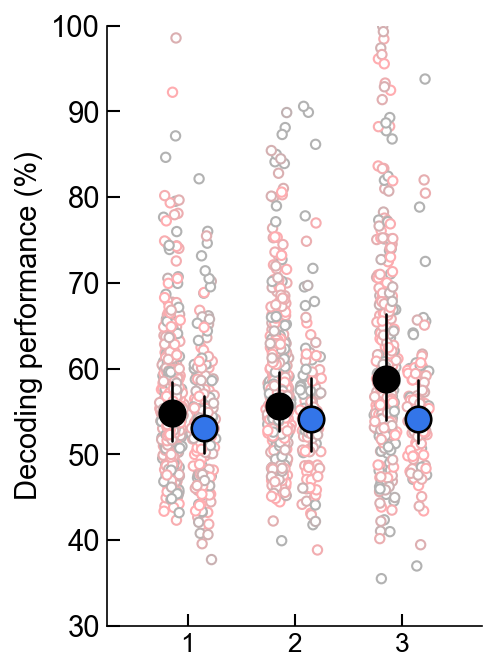

In [38]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(2.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mn = 3.5
spread = 2.5
    
###
    
FRmod_baseline_median = 3.5
# data = [Stim_On_Dec_preearly,Stim_On_Dec_prelate,Stim_On_Dec_preexpert,Stim_On_Dec_postearly,Stim_On_Dec_postlate,Stim_On_Dec_postexpert]
# FRmoddata = [FRmod_On_preearly,FRmod_On_prelate,FRmod_On_preexpert,FRmod_On_postearly,FRmod_On_postlate,FRmod_On_postexpert]
data = [Stim_On_Dec_postearly,Stim_On_Dec_postlate,Stim_On_Dec_postexpert]
control_data = [Control_Stim_Dec_postearly,Control_Stim_Dec_postlate,Control_Stim_Dec_postexpert]
FRmoddata = [FRmod_On_postearly,FRmod_On_postlate,FRmod_On_postexpert]
labels = ['1','2','3']
numCon = len(data)
X = [np.ones(len(l))*idx + polarity*switch_offset for idx,(l,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1]))]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.2,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.2,minjitter=0.075)
colors = NCR_CR_cmap((np.concatenate(FRmoddata)-1)/5)

ax.scatter(X+0.15, Y, s=size, ec=colors, fc='white', lw=1,zorder=-10)

#Plot summary
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color= LASER_COLOR#'k'#NCR_CR_cmap((percentCR-40)/20)
    border_color = 'k'#NCR_CR_cmap((percentCR-40)/20)  
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)
    
    ax.scatter([idx+polarity*switch_offset+0.15], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset+0.15, idx+polarity*switch_offset+0.15], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    

    
    
    
    
    
    
    

    
FRmod_baseline_median = 3.5
# data = [Stim_On_Dec_preearly,Stim_On_Dec_prelate,Stim_On_Dec_preexpert,Stim_On_Dec_postearly,Stim_On_Dec_postlate,Stim_On_Dec_postexpert]
# FRmoddata = [FRmod_On_preearly,FRmod_On_prelate,FRmod_On_preexpert,FRmod_On_postearly,FRmod_On_postlate,FRmod_On_postexpert]
data = [Stim_On_Dec_postearly,Stim_On_Dec_postlate,Stim_On_Dec_postexpert]
control_data = [Control_Stim_Dec_postearly,Control_Stim_Dec_postlate,Control_Stim_Dec_postexpert]
FRmoddata = [FRmod_On_postearly,FRmod_On_postlate,FRmod_On_postexpert]
labels = ['1','2','3']
numCon = len(data)
X = [np.ones(len(l))*idx + polarity*switch_offset for idx,(l,polarity) in enumerate(zip(control_data,[-1,-1,-1,1,1,1]))]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(control_data),width=0.2,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(control_data)),width=0.2,minjitter=0.075)
colors = NCR_CR_cmap((np.concatenate(FRmoddata)-1)/5)

ax.scatter(X-0.15, Y, s=size, ec=colors, fc='white', lw=1,zorder=-10)

#Plot summary
for idx,(column,polarity) in enumerate(zip(control_data,[-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color= 'k'#NCR_CR_cmap((percentCR-40)/20)
    border_color = 'k'#NCR_CR_cmap((percentCR-40)/20)  
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)
    
    ax.scatter([idx+polarity*switch_offset-0.15], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset-0.15, idx+polarity*switch_offset-0.15], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
    
    
    
    
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.4,zorder=-5)

################################################################################################################
ax.set_ylim([0.3,1])
ax.set_yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticklabels(['30','40','50','60','70','80','90','100'])
ylab = ax.set_ylabel('Decoding performance (%)')

ax.set_xlim([-0.75-switch_offset,2.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset])
ax.set_xticklabels(labels)

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
# # t1 = ax.text(xtick_pos_con, Yval, 'Control', ha='center', va='bottom', fontsize=stdfont,color='k')
# t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
# ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab]
# fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin decoding performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

### Opsin Only

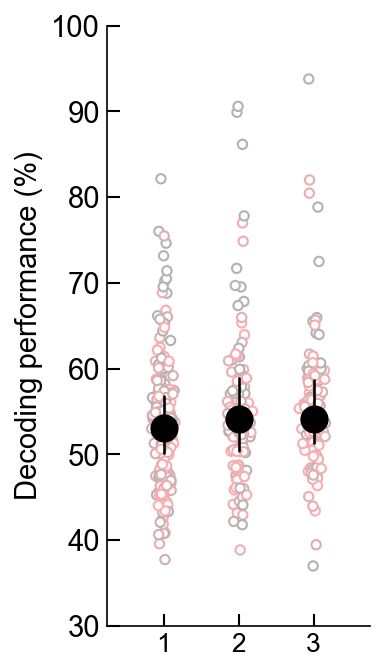

In [11]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(1.75, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mn = 3.5
spread = 2.5
    
###
    
FRmod_baseline_median = 3.5
# data = [Stim_On_Dec_preearly,Stim_On_Dec_prelate,Stim_On_Dec_preexpert,Stim_On_Dec_postearly,Stim_On_Dec_postlate,Stim_On_Dec_postexpert]
# FRmoddata = [FRmod_On_preearly,FRmod_On_prelate,FRmod_On_preexpert,FRmod_On_postearly,FRmod_On_postlate,FRmod_On_postexpert]
data = [Stim_On_Dec_postearly,Stim_On_Dec_postlate,Stim_On_Dec_postexpert]
FRmoddata = [FRmod_On_postearly,FRmod_On_postlate,FRmod_On_postexpert]
labels = ['1','2','3']
numCon = len(data)
X = [np.ones(len(l))*idx + polarity*switch_offset for idx,(l,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1]))]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.4,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.4,minjitter=0.075)
colors = NCR_CR_cmap((np.concatenate(FRmoddata)-1)/5)

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=1,zorder=-10)

#Plot summary
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color= 'k'#NCR_CR_cmap((percentCR-40)/20)
    border_color = 'k'#NCR_CR_cmap((percentCR-40)/20)  
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)
    
    ax.scatter([idx+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset, idx+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.4,zorder=-5)

################################################################################################################
ax.set_ylim([0.3,1])
ax.set_yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticklabels(['30','40','50','60','70','80','90','100'])
ylab = ax.set_ylabel('Decoding performance (%)')

ax.set_xlim([-0.75-switch_offset,2.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset])
ax.set_xticklabels(labels)

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
# # t1 = ax.text(xtick_pos_con, Yval, 'Control', ha='center', va='bottom', fontsize=stdfont,color='k')
# t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
# ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin decoding performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [12]:
data_dec = SimpleNamespace()
data_dec.early = Stim_On_Dec_postearly
data_dec.late = Stim_On_Dec_postlate
data_dec.expert = Stim_On_Dec_postexpert
ilep.nonparametricIndependentStatsCompareToPreviousSmall(data_dec)
pass

            Source        SS     DF        MS         F     p-unc       np2
0            phase  0.012261    1.0  0.012261  1.966727  0.161320  0.003311
1          context  0.012261    1.0  0.012261  1.966727  0.161320  0.003311
2  phase * context  0.009278    1.0  0.009278  1.488291  0.222968  0.002508
3         Residual  3.690608  592.0  0.006234       NaN       NaN       NaN

        phase         A             B     p-unc    p-corr    hedges
2  pre-expert  baseline  experimental  0.609196  0.609196  0.001717
3    pre-late  baseline  experimental  0.158903  0.317805 -0.215921
key early has 239 non-nan elements
key late has 121 non-nan elements
key expert has 115 non-nan elements


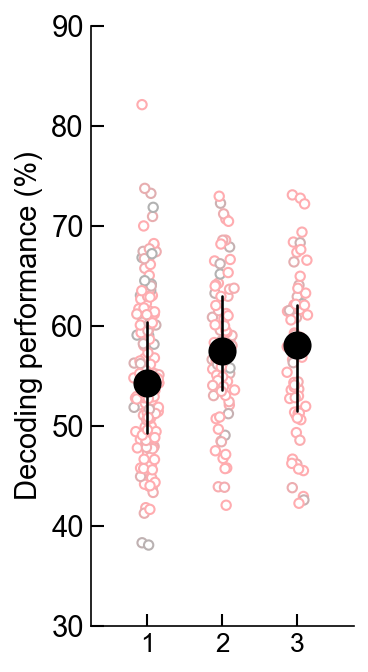

In [13]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(1.75, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mn = 0.8
spread = 0.5
    
###
    
FRmod_baseline_median = 3.5
# data = [Stim_On_Dec_preearly,Stim_On_Dec_prelate,Stim_On_Dec_preexpert,Stim_On_Dec_postearly,Stim_On_Dec_postlate,Stim_On_Dec_postexpert]
# FRmoddata = [FRmod_On_preearly,FRmod_On_prelate,FRmod_On_preexpert,FRmod_On_postearly,FRmod_On_postlate,FRmod_On_postexpert]
data = [Choice_On_Dec_postearly,Choice_On_Dec_postlate,Choice_On_Dec_postexpert]
FRmoddata = [ChoiceMod_On_postearly,ChoiceMod_On_postlate,ChoiceMod_On_postexpert]
labels = ['1','2','3']
numCon = len(data)
X = [np.ones(len(l))*idx + polarity*switch_offset for idx,(l,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1]))]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.4,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.4,minjitter=0.075)
colors = NCR_CR_cmap((np.concatenate(FRmoddata)-1)/5)

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=1,zorder=-10)

#Plot summary
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color= 'k'#NCR_CR_cmap((percentCR-40)/20)
    border_color = 'k'#NCR_CR_cmap((percentCR-40)/20)  
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)
    
    ax.scatter([idx+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset, idx+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.4,zorder=-5)

################################################################################################################
ax.set_ylim([0.3,0.9])
ax.set_yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax.set_yticklabels(['30','40','50','60','70','80','90'])
ylab = ax.set_ylabel('Decoding performance (%)')

ax.set_xlim([-0.75-switch_offset,2.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset])
ax.set_xticklabels(labels)

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
# # t1 = ax.text(xtick_pos_con, Yval, 'Control', ha='center', va='bottom', fontsize=stdfont,color='k')
# t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
# ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin choice decoding performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [14]:
data_dec = SimpleNamespace()
data_dec.early = Choice_On_Dec_postearly
data_dec.late = Choice_On_Dec_postlate
data_dec.expert = Choice_On_Dec_postexpert
ilep.nonparametricIndependentStatsCompareToPreviousSmall(data_dec)
pass

            Source        SS     DF        MS         F     p-unc       np2
0            phase  0.019284    1.0  0.019284  3.490301  0.062462  0.008672
1          context  0.019284    1.0  0.019284  3.490301  0.062462  0.008672
2  phase * context  0.023854    1.0  0.023854  4.317445  0.038362  0.010705
3         Residual  2.204471  399.0  0.005525       NaN       NaN       NaN

        phase         A             B     p-unc    p-corr    hedges
2  pre-expert  baseline  experimental  0.709772  0.709772  0.068250
3    pre-late  baseline  experimental  0.003287  0.006575 -0.365304
key early has 166 non-nan elements
key late has 84 non-nan elements
key expert has 69 non-nan elements


In [56]:
mannwhitneyu(ilep.rmnan(Choice_On_Dec_postearly),ilep.rmnan(Choice_On_Dec_postexpert)).pvalue

0.03272813126812216

In [ ]:
data_dec = SimpleNamespace()
data_dec.early = Choice_On_Dec_postearly
data_dec.late = Choice_On_Dec_postlate
data_dec.expert = Choice_On_Dec_postexpert
data_off_dec = SimpleNamespace()
data_off_dec.early = Choice_Off_Dec_postearly
data_off_dec.late = Choice_Off_Dec_postlate
data_off_dec.expert = Choice_Off_Dec_postexpert
ilep.nonparametricIndependentStatsCompareToPreviousSmall(data_dec)
pass

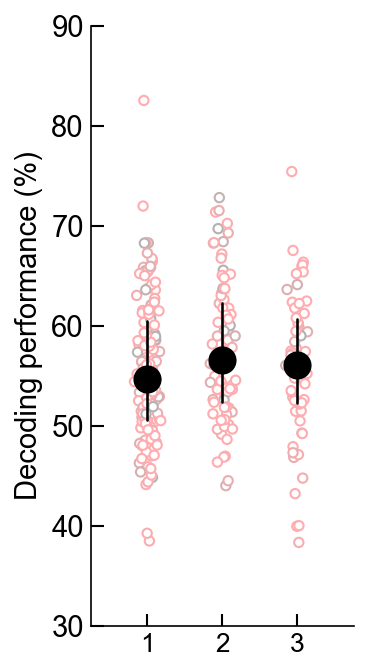

In [15]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(1.75, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mn = 0.8
spread = 0.5
    
###
    
FRmod_baseline_median = 3.5
# data = [Stim_On_Dec_preearly,Stim_On_Dec_prelate,Stim_On_Dec_preexpert,Stim_On_Dec_postearly,Stim_On_Dec_postlate,Stim_On_Dec_postexpert]
# FRmoddata = [FRmod_On_preearly,FRmod_On_prelate,FRmod_On_preexpert,FRmod_On_postearly,FRmod_On_postlate,FRmod_On_postexpert]
data = [Choice_Off_Dec_postearly,Choice_Off_Dec_postlate,Choice_Off_Dec_postexpert]
FRmoddata = [ChoiceMod_On_postearly,ChoiceMod_On_postlate,ChoiceMod_On_postexpert]
labels = ['1','2','3']
numCon = len(data)
X = [np.ones(len(l))*idx + polarity*switch_offset for idx,(l,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1]))]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.4,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.4,minjitter=0.075)
colors = NCR_CR_cmap((np.concatenate(FRmoddata)-1)/5)

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=1,zorder=-10)

#Plot summary
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color= 'k'#NCR_CR_cmap((percentCR-40)/20)
    border_color = 'k'#NCR_CR_cmap((percentCR-40)/20)  
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)
    
    ax.scatter([idx+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset, idx+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.4,zorder=-5)

################################################################################################################
ax.set_ylim([0.3,0.9])
ax.set_yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax.set_yticklabels(['30','40','50','60','70','80','90'])
ylab = ax.set_ylabel('Decoding performance (%)')

ax.set_xlim([-0.75-switch_offset,2.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset])
ax.set_xticklabels(labels)

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
# # t1 = ax.text(xtick_pos_con, Yval, 'Control', ha='center', va='bottom', fontsize=stdfont,color='k')
# t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
# ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab]
# fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin choice laser off decoding performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [60]:
data_dec = SimpleNamespace()
data_dec.early = Choice_Off_Dec_postearly
data_dec.late = Choice_Off_Dec_postlate
data_dec.expert = Choice_Off_Dec_postexpert
ilep.nonparametricIndependentStatsCompareToPreviousSmall(data_dec)
pass

            Source        SS     DF        MS         F     p-unc       np2
0            phase  0.002745    1.0  0.002745  0.563145  0.453477  0.001532
1          context  0.002745    1.0  0.002745  0.563145  0.453477  0.001532
2  phase * context  0.023335    1.0  0.023335  4.787329  0.029300  0.012877
3         Residual  1.788851  367.0  0.004874       NaN       NaN       NaN

        phase         A             B     p-unc    p-corr    hedges
2  pre-expert  baseline  experimental  0.469648  0.469648  0.202865
3    pre-late  baseline  experimental  0.057625  0.115249 -0.272422
key early has 147 non-nan elements
key late has 81 non-nan elements
key expert has 62 non-nan elements


C:\Users\4thgr\anaconda3\envs\EphysAnalysis\lib\site-packages\pingouin\pairwise.py:579: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'fdr_bh' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats.loc[idxiter, "p-adjust"] = padjust


In [33]:
data_dec = SimpleNamespace()
data_dec.preearly = [0]
data_dec.prelate = [0]
data_dec.preexpert = [0]
data_dec.postearly = Stim_On_Dec_postearly
data_dec.postlate = Stim_On_Dec_postlate
data_dec.postexpert = Stim_On_Dec_postexpert
ilep.nonparametricIndependentStatsCompareToPrevious(data_dec)
pass

            Source        SS     DF        MS          F         p-unc  \
0            phase  1.197405    3.0  0.399135  65.618000  6.132009e-37   
1          context  0.005135    1.0  0.005135   0.844165  3.585594e-01   
2  phase * context  0.019265    3.0  0.006422   1.055740  3.673454e-01   
3         Residual  3.838186  631.0  0.006083        NaN           NaN   

        np2  
0  0.237788  
1  0.001336  
2  0.004994  
3       NaN  

          phase         A             B     p-unc   p-corr    hedges
7   post-expert  baseline  experimental  0.984766  1.00000  0.080088
8     post-late  baseline  experimental  0.158903  0.63561 -0.215921
9    pre-expert  baseline  experimental  1.000000  1.00000       NaN
10     pre-late  baseline  experimental  1.000000  1.00000       NaN


C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\pingouin\effsize.py:803: RuntimeWarning: invalid value encountered in double_scalars
  d = (x.mean() - y.mean()) / poolsd
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [26]:
data_dec = SimpleNamespace()
data_dec.preearly = [0]
data_dec.prelate = [0]
data_dec.preexpert = [0]
data_dec.postearly = Stim_On_Dec_postearly
data_dec.postlate = Stim_On_Dec_postlate
data_dec.postexpert = Stim_On_Dec_postexpert
ilep.nonparametricIndependentStatsCompareToOwnEarly(data_dec)
pass

            Source        SS     DF        MS          F         p-unc  \
0            phase  1.177959    3.0  0.392653  70.275220  6.725084e-41   
1          context  0.000028    1.0  0.000028   0.004936  9.440053e-01   
2  phase * context  0.001241    3.0  0.000414   0.074058  9.739169e-01   
3         Residual  5.106849  914.0  0.005587        NaN           NaN   

        np2  
0  0.187430  
1  0.000005  
2  0.000243  
3       NaN  

          phase         A             B     p-unc  p-corr    hedges
7   post-expert  baseline  experimental  0.342408     1.0 -0.039398
8     post-late  baseline  experimental  0.916730     1.0  0.036722
9    pre-expert  baseline  experimental  1.000000     1.0       NaN
10     pre-late  baseline  experimental  1.000000     1.0       NaN


C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\pingouin\effsize.py:803: RuntimeWarning: invalid value encountered in double_scalars
  d = (x.mean() - y.mean()) / poolsd
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


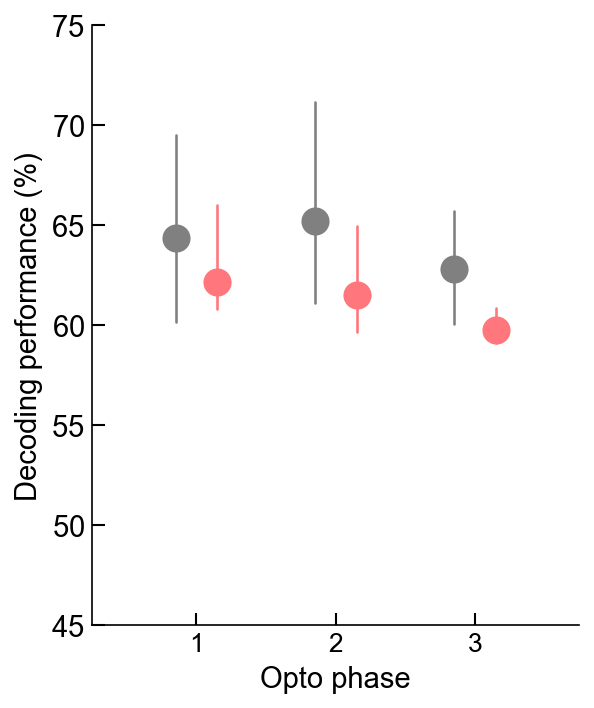

In [126]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0
wid = 0.15

################################################################################################################
CR_accs = [Stim_On_CR_Dec_postearly,Stim_On_CR_Dec_postlate,Stim_On_CR_Dec_postexpert]
NCR_accs = [Stim_On_NCR_Dec_postearly,Stim_On_NCR_Dec_postlate,Stim_On_NCR_Dec_postexpert]



for idx,(CR_Stim_Dec,p) in enumerate(zip(CR_accs,[1,1,1])):
    Q1, median, Q3 = (np.percentile(ilep.rmnan(CR_Stim_Dec)*100, q) for q in [25, 50, 75])
    summary_size=150
    summary_width=1.25
    eye_color=CR_COLOR
    border_color=CR_COLOR
    ax.scatter([idx-wid+p*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+-wid+p*switch_offset]*2, [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

for idx,(NCR_Stim_Dec,p) in enumerate(zip(NCR_accs,[1,1,1])):
    Q1, median, Q3 = (np.percentile(ilep.rmnan(NCR_Stim_Dec)*100, q) for q in [25, 50, 75])
    summary_size=150
    summary_width=1.25
    eye_color=NCR_COLOR
    border_color=NCR_COLOR
    ax.scatter([idx+wid+p*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+wid+p*switch_offset]*2, [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

################################################################################################################
labels = [1,2,3]

# ax.set_ylim([45,75])
# ax.set_yticks([45,50,55,60,65,70,75])
# ax.set_ylim([45,65])
ax.set_ylim([45,75])
# ax.set_yticks([45,50,55,60,65])
ax.set_yticks([45,50,55,60,65,70,75])
ylab = ax.set_ylabel('Decoding performance (%)')

ax.set_xlim([-0.75-switch_offset,2.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset])
ax.set_xticklabels(labels)
xlab = ax.set_xlabel('Opto phase')

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
# t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
# ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab]#,t1,t2]
# plt.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opto CR NCR Decoding accuracy V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')
plt.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opto CR NCR Decoding accuracy task encoders V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [127]:
data_dec = SimpleNamespace()
data_dec.early = Stim_On_CR_Dec_postearly
data_dec.late = Stim_On_CR_Dec_postlate
data_dec.expert = Stim_On_CR_Dec_postexpert

data_dec2 = SimpleNamespace()
data_dec2.early = Stim_On_NCR_Dec_postearly
data_dec2.late = Stim_On_NCR_Dec_postlate
data_dec2.expert = Stim_On_NCR_Dec_postexpert

ilep.nonparametricIndependentStatsCompareToOtherSmall(data_dec,data_dec2)
pass

            Source        SS     DF        MS         F     p-unc       np2
0            phase  0.008791    2.0  0.004395  0.763429  0.468762  0.015039
1          context  0.026579    1.0  0.026579  4.616411  0.034082  0.044127
2  phase * context  0.005470    2.0  0.002735  0.475024  0.623266  0.009411
3         Residual  0.575754  100.0  0.005758       NaN       NaN       NaN

    phase  A  B     p-unc    p-corr    hedges
4   early  A  B  0.719783  0.719783  0.294756
5  expert  A  B  0.043763  0.131288  0.356135
6    late  A  B  0.133490  0.200235  0.577594
key early has 25 and 17 non-nan elements
key late has 18 and 14 non-nan elements
key expert has 16 and 16 non-nan elements


In [43]:
len(Stim_On_CR_Dec_postearly)

94

In [44]:
len(Stim_On_CR_Dec_postlate)

48

In [45]:
len(Stim_On_CR_Dec_postexpert)

43

In [48]:
len(Stim_On_NCR_Dec_postearly)

192

In [49]:
len(Stim_On_NCR_Dec_postlate)

92

In [50]:
len(Stim_On_NCR_Dec_postexpert)

101

In [51]:
94+48+43+192+92+101

570

In [52]:
94+48+43

185

In [53]:
192+92+101

385

# Decoding performance compared to controls

In [11]:
EnumSessionOps = []
EnumClustOps = []
sessions = os.listdir(ops_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    if sessionfile.meta.region != 'AC':
        continue
    if sessionfile.meta.task not in ['opto nonreversal','opto switch','opto reversal']:
        continue
        
    if sessionfile.meta.animal not in did_not_learn_animals:
        continue
        
    if hasattr(animalBehaviors[sessionfile.meta.animal],'cloudiness') and sessionfile.meta.day_of_training >= animalBehaviors[sessionfile.meta.animal].cloudiness:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSessionOps.append(session)
        EnumClustOps.append(clust)

100%|██████████| 167/167 [00:02<00:00, 68.29it/s] 


In [12]:
EILphasesOps = np.full_like(EnumSessionOps,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSessionOps)):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        day_after_reversal = day - animalBehaviors[animal].reversal
            
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphasesOps[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphasesOps[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphasesOps[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphasesOps[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day_after_reversal <= 2:#4:
            EILphasesOps[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day_after_reversal <= 4:#7:
            EILphasesOps[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day_after_reversal >= 5:#7:
            EILphasesOps[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 902/902 [00:21<00:00, 42.61it/s] 

errors for: []


In [13]:
EnumSessionControl = []
EnumClustControl = []
sessions1 = os.listdir(act_directory)
sessions2 = os.listdir(ops_directory)
sessions = np.concatenate((sessions1,sessions2))
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached([act_directory,ops_directory],session)
    
    if sessionfile.meta.region != 'AC':
        continue
    if sessionfile.meta.task not in ['nonreversal','switch','reversal','opto control nonreversal','opto control switch','opto control reversal']:
        continue
        
    if sessionfile.meta.animal not in opsin_control_animals:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSessionControl.append(session)
        EnumClustControl.append(clust)

100%|██████████| 907/907 [00:10<00:00, 90.26it/s] 


In [14]:
EILphasesControl = np.full_like(EnumSessionControl,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSessionControl)):
#     sessionfile = ilep.loadSessionCached(act_directory,session)
    sessionfile = ilep.loadSessionCached([act_directory,ops_directory],session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch','opto control switch']:
            EILphasesControl[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','opto control nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphasesControl[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','opto control nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphasesControl[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','opto control nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphasesControl[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','opto control reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphasesControl[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','opto control reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphasesControl[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','opto control reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphasesControl[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        raise e
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 832/832 [00:11<00:00, 74.62it/s] 

errors for: []


# Load Decoding

In [15]:
stim_25s_df = pd.read_csv(stim25sdecodingfilename)
passive_df = pd.read_csv(passivedecodingfilename)
choice_df = pd.read_csv(choicedecodingfilename)
opsin_df = pd.read_csv(opsindecodingfilename)
opsinon_df = pd.read_csv(opsinondecodingfilename)
copsin_df = pd.read_csv(copsindecodingfilename)
copsinon_df = pd.read_csv(copsinondecodingfilename)
copsinoff_df = pd.read_csv(copsinoffdecodingfilename)
dec_df = pd.concat([stim_25s_df,choice_df,passive_df,opsinon_df,opsin_df,copsin_df,copsinon_df,copsinoff_df])

def getDataPoint(df,session,clust,categories,column):
    df = df[df['session']==session]
    df = df[df['clust']==clust]
    df = df[df['categories']==categories]
    val = list(df[column])
    if len(val) == 1:
        return val[0]
    elif len(val) <= 0:
        return np.nan
    else:
        raise Exception('Incorrent length. Duplicate values')

In [16]:
ops_stim_acc = []
ops_stim_acc_s = []
ops_pval_stim_s = []
for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionOps,EnumClustOps))):
    ops_stim_accuracy = getDataPoint(dec_df,session,clust,'stimulus_on','weighted_accuracy')
    ops_pvalue_stim_s = getDataPoint(dec_df,session,clust,'stimulus_on','pval_synthetic_control')
    ops_stim_acc.append(ops_stim_accuracy)
    ops_pval_stim_s.append(ops_pvalue_stim_s)
ops_stim_acc = np.array(ops_stim_acc)
ops_pval_stim_s = np.array(ops_pval_stim_s)

control_stim_acc = []
control_stim_acc_s = []
control_pval_stim_s = []
for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionControl,EnumClustControl))):
    control_stim_accuracy = getDataPoint(dec_df,session,clust,'stimulus','weighted_accuracy')
    control_pvalue_stim_s = getDataPoint(dec_df,session,clust,'stimulus','pval_synthetic_control')
    control_stim_acc.append(control_stim_accuracy)
    control_pval_stim_s.append(control_pvalue_stim_s)
control_stim_acc = np.array(control_stim_acc)
control_pval_stim_s = np.array(control_pval_stim_s)

def get_TE_mask(acc,pval_s,pval_c):
    low_decoders = np.less(acc,0.5)
    low_accuracies = acc[low_decoders]
    low_magnitudes = np.absolute(low_accuracies-0.5)

    low_magnitudes = np.sort(low_magnitudes)
    task_encoder_threshold = 0.5+low_magnitudes[int(0.95 * len(low_magnitudes))]
    print('Task encoder threshold: '+str(task_encoder_threshold))

    is_finite = np.isfinite(acc)
    is_valid_pval = np.less(pval_s,0.05) #np.less(pval_c,0.05))
    is_TE = np.greater_equal(acc,task_encoder_threshold)
    is_TE = np.logical_and(is_TE,is_finite)
    is_TE = np.logical_and(is_TE,is_valid_pval)
    return is_TE,task_encoder_threshold

is_TE_Ops,task_encoder_threshold_Ops = get_TE_mask(ops_stim_acc,ops_pval_stim_s,None)
is_TE_Control,task_encoder_threshold_Control = get_TE_mask(control_stim_acc,control_pval_stim_s,None)

902it [00:02, 303.53it/s]
832it [00:02, 298.25it/s]

Task encoder threshold: 0.5855125094850949
Task encoder threshold: 0.550523274


In [17]:
Stim_On_Dec_preearly = []
Stim_On_Dec_prelate = []
Stim_On_Dec_preexpert = []
Stim_On_Dec_postearly = []
Stim_On_Dec_postlate = []
Stim_On_Dec_postexpert = []

Control_Stim_Dec_preearly = []
Control_Stim_Dec_prelate = []
Control_Stim_Dec_preexpert = []
Control_Stim_Dec_postearly = []
Control_Stim_Dec_postlate = []
Control_Stim_Dec_postexpert = []

Choice_On_Dec_preearly = []
Choice_On_Dec_prelate = []
Choice_On_Dec_preexpert = []
Choice_On_Dec_postearly = []
Choice_On_Dec_postlate = []
Choice_On_Dec_postexpert = []

Control_Choice_Dec_preearly = []
Control_Choice_Dec_prelate = []
Control_Choice_Dec_preexpert = []
Control_Choice_Dec_postearly = []
Control_Choice_Dec_postlate = []
Control_Choice_Dec_postexpert = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionOps,EnumClustOps))):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
#     if not is_TE_Ops[idx]:
#         continue
    
    if session == 'AE_287_2_opto_control_AC.pickle' and clust in [47,80,297,309]:
        continue
    if session == 'AE_287_3_opto_control_AC.pickle' and clust in [16,17,99,214,248]:
        continue
    if session == 'AE_287_4_opto_control_AC.pickle' and clust in [28,98]:
        continue
    if session == 'AE_287_8_opto_control_AC.pickle' and clust in [35,149]:
        continue
    if session == 'AE_287_9_opto_control_AC.pickle' and clust in [84]:
        continue
    if session == 'AE_287_10_opto_control_AC.pickle' and clust in [38]:
        continue
    
    stim_acc = getDataPoint(dec_df,session,clust,'stimulus_on','weighted_accuracy')
    stim_acc_control = getDataPoint(dec_df,session,clust,'stimulus','synthetic_control_weighted_accuracy')
    if getDataPoint(dec_df,session,clust,'stimulus_on','pval_synthetic_control') > 0.05:
        stim_acc = np.nan
        
    choice_acc = getDataPoint(dec_df,session,clust,'response_on','weighted_accuracy')
    choice_acc_control = getDataPoint(dec_df,session,clust,'response','synthetic_control_weighted_accuracy')
    if getDataPoint(dec_df,session,clust,'response_on','pval_synthetic_control') > 0.05:
        choice_acc = np.nan
        
    if EILphasesOps[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
    
    if EILphasesOps[idx] == 'pre early':
        Stim_On_Dec_preearly.append(stim_acc)
        Choice_On_Dec_preearly.append(choice_acc)
    elif EILphasesOps[idx] == 'pre late':
        Stim_On_Dec_prelate.append(stim_acc)
        Choice_On_Dec_prelate.append(choice_acc)
    elif EILphasesOps[idx] == 'pre expert':
        Stim_On_Dec_preexpert.append(stim_acc)
        Choice_On_Dec_preexpert.append(choice_acc)
    elif EILphasesOps[idx] == 'post early':
        Stim_On_Dec_postearly.append(stim_acc)
        Choice_On_Dec_postearly.append(choice_acc)
    elif EILphasesOps[idx] == 'post late':
        Stim_On_Dec_postlate.append(stim_acc)
        Choice_On_Dec_postlate.append(choice_acc)
    elif EILphasesOps[idx] == 'post expert':
        Stim_On_Dec_postexpert.append(stim_acc)
        Choice_On_Dec_postexpert.append(choice_acc)
        
        
        
for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionControl,EnumClustControl))):
    sessionfile = ilep.loadSessionCached([act_directory,ops_directory],session)
    
#     if not is_TE_Control[idx]:
#         continue
    
    if session == 'AE_287_2_opto_control_AC.pickle' and clust in [47,80,297,309]:
        continue
    if session == 'AE_287_3_opto_control_AC.pickle' and clust in [16,17,99,214,248]:
        continue
    if session == 'AE_287_4_opto_control_AC.pickle' and clust in [28,98]:
        continue
    if session == 'AE_287_8_opto_control_AC.pickle' and clust in [35,149]:
        continue
    if session == 'AE_287_9_opto_control_AC.pickle' and clust in [84]:
        continue
    if session == 'AE_287_10_opto_control_AC.pickle' and clust in [38]:
        continue
    
    stim_acc = getDataPoint(dec_df,session,clust,'stimulus','weighted_accuracy')
    stim_acc_control = getDataPoint(dec_df,session,clust,'stimulus','synthetic_control_weighted_accuracy')
    if getDataPoint(dec_df,session,clust,'stimulus','pval_synthetic_control') > 0.05:
        stim_acc = np.nan
        
    choice_acc = getDataPoint(dec_df,session,clust,'response','weighted_accuracy')
    choice_acc_control = getDataPoint(dec_df,session,clust,'response','synthetic_control_weighted_accuracy')
    if getDataPoint(dec_df,session,clust,'response','pval_synthetic_control') > 0.05:
        choice_acc = np.nan
        
    if EILphasesControl[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
    
    if EILphasesControl[idx] == 'pre early':
        Control_Stim_Dec_preearly.append(stim_acc)
        Control_Choice_Dec_preearly.append(choice_acc)
    elif EILphasesControl[idx] == 'pre late':
        Control_Stim_Dec_prelate.append(stim_acc)
        Control_Choice_Dec_prelate.append(choice_acc)
    elif EILphasesControl[idx] == 'pre expert':
        Control_Stim_Dec_preexpert.append(stim_acc)
        Control_Choice_Dec_preexpert.append(choice_acc)
    elif EILphasesControl[idx] == 'post early':
        Control_Stim_Dec_postearly.append(stim_acc)
        Control_Choice_Dec_postearly.append(choice_acc)
    elif EILphasesControl[idx] == 'post late':
        Control_Stim_Dec_postlate.append(stim_acc)
        Control_Choice_Dec_postlate.append(choice_acc)
    elif EILphasesControl[idx] == 'post expert':
        Control_Stim_Dec_postexpert.append(stim_acc)
        Control_Choice_Dec_postexpert.append(choice_acc)

Stim_On_Dec_preearly = np.array(Stim_On_Dec_preearly)
Stim_On_Dec_prelate = np.array(Stim_On_Dec_prelate)
Stim_On_Dec_preexpert = np.array(Stim_On_Dec_preexpert)
Stim_On_Dec_postearly = np.array(Stim_On_Dec_postearly)
Stim_On_Dec_postlate = np.array(Stim_On_Dec_postlate)
Stim_On_Dec_postexpert = np.array(Stim_On_Dec_postexpert)

Choice_On_Dec_preearly = np.array(Choice_On_Dec_preearly)
Choice_On_Dec_prelate = np.array(Choice_On_Dec_prelate)
Choice_On_Dec_preexpert = np.array(Choice_On_Dec_preexpert)
Choice_On_Dec_postearly = np.array(Choice_On_Dec_postearly)
Choice_On_Dec_postlate = np.array(Choice_On_Dec_postlate)
Choice_On_Dec_postexpert = np.array(Choice_On_Dec_postexpert)

Control_Stim_Dec_preearly = np.array(Control_Stim_Dec_preearly)
Control_Stim_Dec_prelate = np.array(Control_Stim_Dec_prelate)
Control_Stim_Dec_preexpert = np.array(Control_Stim_Dec_preexpert)
Control_Stim_Dec_postearly = np.array(Control_Stim_Dec_postearly)
Control_Stim_Dec_postlate = np.array(Control_Stim_Dec_postlate)
Control_Stim_Dec_postexpert = np.array(Control_Stim_Dec_postexpert)

Control_Choice_Dec_preearly = np.array(Control_Choice_Dec_preearly)
Control_Choice_Dec_prelate = np.array(Control_Choice_Dec_prelate)
Control_Choice_Dec_preexpert = np.array(Control_Choice_Dec_preexpert)
Control_Choice_Dec_postearly = np.array(Control_Choice_Dec_postearly)
Control_Choice_Dec_postlate = np.array(Control_Choice_Dec_postlate)
Control_Choice_Dec_postexpert = np.array(Control_Choice_Dec_postexpert)

902it [00:31, 28.98it/s]
832it [00:20, 41.28it/s]


In [18]:
opsin_control_animals

array(['BS_42', 'BS_108', 'BS_56', 'BS_72', 'BS_70', 'BS_87', 'AE_312'],
      dtype='<U6')

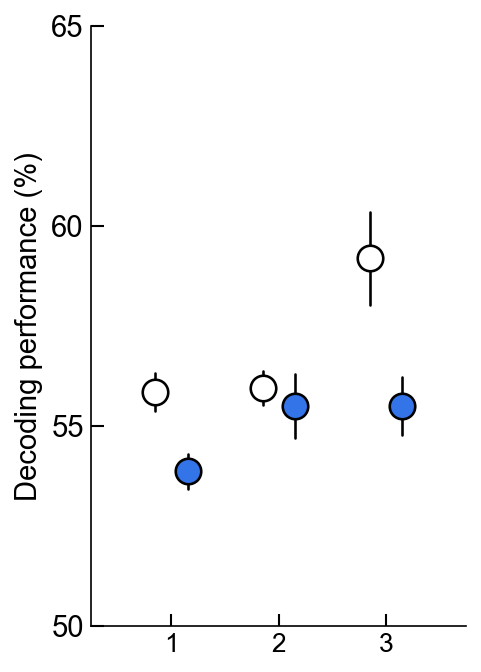

In [20]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(2.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0
offset=0.15

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mn = 3.5
spread = 2.5
    
###
    
FRmod_baseline_median = 3.5
data = [Stim_On_Dec_postearly,Stim_On_Dec_postlate,Stim_On_Dec_postexpert]
control_data = [Control_Stim_Dec_postearly,Control_Stim_Dec_postlate,Control_Stim_Dec_postexpert]
labels = ['1','2','3']
numCon = len(data)


# X = [np.ones(len(l))*idx + polarity*switch_offset - offset for idx,(l,polarity) in enumerate(zip(control_data,[-1,-1,-1,1,1,1]))]
# _,Y = ilep.violin(np.concatenate(X),np.concatenate(control_data),width=0.4,minjitter=0.075)
# X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(control_data)),width=0.2,minjitter=0.075)
# ax.scatter(X, Y, s=size, ec='k', fc='white', lw=1,zorder=-10)

# X = [np.ones(len(l))*idx + polarity*switch_offset + offset for idx,(l,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1]))]
# _,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.4,minjitter=0.075)
# X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.2,minjitter=0.075)
# ax.scatter(X, Y, s=size, ec=LASER_COLOR, fc='white', lw=1,zorder=-10)



#Plot summary
for idx,(column,polarity) in enumerate(zip(control_data,[-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    eye_color= 'white'
    border_color = 'k'
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    ax.scatter([idx+polarity*switch_offset-offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset-offset, idx+polarity*switch_offset-offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    

#Plot summary
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    eye_color= 'k'
    border_color = 'k'
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    ax.scatter([idx+polarity*switch_offset+offset], [median], ec=border_color,fc=LASER_COLOR, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset+offset, idx+polarity*switch_offset+offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
    
    
    
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.4,zorder=-5)

################################################################################################################
ax.set_ylim([0.5,0.65])
ax.set_yticks([0.5,0.55,0.6,0.65])
ax.set_yticklabels(['50','55','60','65'])
# ax.set_ylim([0.6,0.70])
# ax.set_yticks([0.6,0.65,0.7])
# ax.set_yticklabels(['60','65','70'])
ylab = ax.set_ylabel('Decoding performance (%)')

ax.set_xlim([-0.75-switch_offset,2.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset])
ax.set_xticklabels(labels)

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
# # t1 = ax.text(xtick_pos_con, Yval, 'Control', ha='center', va='bottom', fontsize=stdfont,color='k')
# t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
# ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin decoding vs control performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [21]:
data_dec = SimpleNamespace()
data_dec.early = np.abs(Stim_On_Dec_postearly)
data_dec.late = np.abs(Stim_On_Dec_postlate)
data_dec.expert = np.abs(Stim_On_Dec_postexpert)

data_dec2 = SimpleNamespace()
data_dec2.early = np.abs(Control_Stim_Dec_postearly)
data_dec2.late = np.abs(Control_Stim_Dec_postlate)
data_dec2.expert = np.abs(Control_Stim_Dec_postexpert)

ilep.nonparametricIndependentStatsCompareToOtherSmall(data_dec,data_dec2)
pass

            Source        SS     DF        MS          F     p-unc       np2
0            phase  0.039933    2.0  0.019967   3.870718  0.021182  0.008300
1          context  0.058081    1.0  0.058081  11.259531  0.000824  0.012026
2  phase * context  0.022159    2.0  0.011080   2.147889  0.117312  0.004623
3         Residual  4.771525  925.0  0.005158        NaN       NaN       NaN

    phase  A  B     p-unc    p-corr    hedges
4   early  A  B  0.003056  0.004584 -0.282126
5  expert  A  B  0.002749  0.004584 -0.490767
6    late  A  B  0.099258  0.099258 -0.062513
key early has 239 and 227 non-nan elements
key late has 121 and 199 non-nan elements
key expert has 115 and 30 non-nan elements


In [26]:
Choice_On_Dec_postlate

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

### Choice

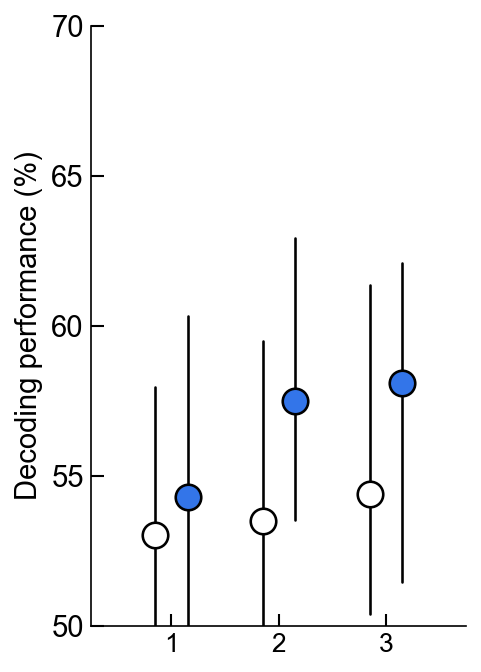

In [39]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(2.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0
offset=0.15

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mn = 3.5
spread = 2.5
    
###
    
FRmod_baseline_median = 3.5
data = [Choice_On_Dec_postearly,Choice_On_Dec_postlate,Choice_On_Dec_postexpert]
control_data = [Control_Choice_Dec_postearly,Control_Choice_Dec_postlate,Control_Choice_Dec_postexpert]
labels = ['1','2','3']
numCon = len(data)


# X = [np.ones(len(l))*idx + polarity*switch_offset - offset for idx,(l,polarity) in enumerate(zip(control_data,[-1,-1,-1,1,1,1]))]
# _,Y = ilep.violin(np.concatenate(X),np.concatenate(control_data),width=0.4,minjitter=0.075)
# X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(control_data)),width=0.2,minjitter=0.075)
# ax.scatter(X, Y, s=size, ec='k', fc='white', lw=1,zorder=-10)

# X = [np.ones(len(l))*idx + polarity*switch_offset + offset for idx,(l,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1]))]
# _,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.4,minjitter=0.075)
# X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.2,minjitter=0.075)
# ax.scatter(X, Y, s=size, ec=LASER_COLOR, fc='white', lw=1,zorder=-10)



#Plot summary
for idx,(column,polarity) in enumerate(zip(control_data,[-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    eye_color= 'white'
    border_color = 'k'
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)
    ax.scatter([idx+polarity*switch_offset-offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset-offset, idx+polarity*switch_offset-offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    

#Plot summary
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    eye_color= 'k'
    border_color = 'k'
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)
    ax.scatter([idx+polarity*switch_offset+offset], [median], ec=border_color,fc=LASER_COLOR, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset+offset, idx+polarity*switch_offset+offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
    
    
    
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.4,zorder=-5)

################################################################################################################
ax.set_ylim([0.5,0.7])
ax.set_yticks([0.5,0.55,0.6,0.65,0.7])
ax.set_yticklabels(['50','55','60','65','70'])
ylab = ax.set_ylabel('Decoding performance (%)')

ax.set_xlim([-0.75-switch_offset,2.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset])
ax.set_xticklabels(labels)

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
# # t1 = ax.text(xtick_pos_con, Yval, 'Control', ha='center', va='bottom', fontsize=stdfont,color='k')
# t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
# ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab]
# fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin decoding vs control performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [41]:
data_dec = SimpleNamespace()
data_dec.early = np.abs(Choice_On_Dec_postearly)
data_dec.late = np.abs(Choice_On_Dec_postlate)
data_dec.expert = np.abs(Choice_On_Dec_postexpert)

data_dec2 = SimpleNamespace()
data_dec2.early = np.abs(Control_Choice_Dec_postearly)
data_dec2.late = np.abs(Control_Choice_Dec_postlate)
data_dec2.expert = np.abs(Control_Choice_Dec_postexpert)

ilep.nonparametricIndependentStatsCompareToOtherSmall(data_dec,data_dec2)
pass

            Source        SS     DF        MS          F     p-unc       np2
0            phase  0.092787    2.0  0.046393   8.376582  0.000248  0.018058
1          context  0.059477    1.0  0.059477  10.738956  0.001089  0.011651
2  phase * context  0.013608    2.0  0.006804   1.228520  0.293210  0.002690
3         Residual  5.045527  911.0  0.005538        NaN       NaN       NaN

    phase  A  B     p-unc    p-corr    hedges
4   early  A  B  0.136831  0.205246  0.175027
5  expert  A  B  0.223588  0.223588  0.122940
6    late  A  B  0.000416  0.001247  0.405273
key early has 166 and 198 non-nan elements
key late has 84 and 245 non-nan elements
key expert has 69 and 155 non-nan elements


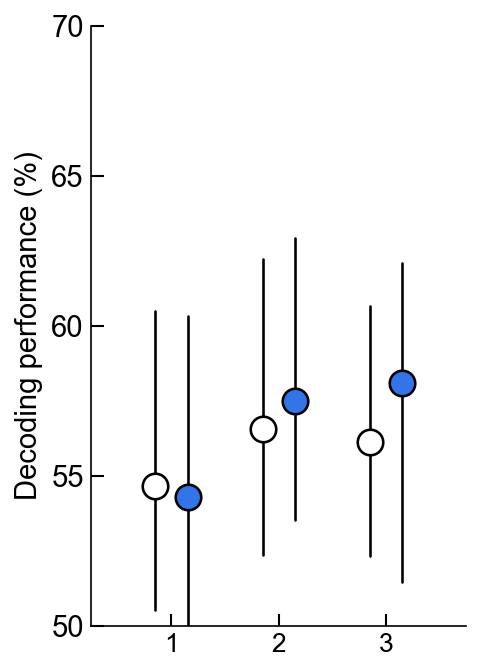

In [44]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(2.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0
offset=0.15

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mn = 3.5
spread = 2.5
    
###
    
FRmod_baseline_median = 3.5
data = [Choice_On_Dec_postearly,Choice_On_Dec_postlate,Choice_On_Dec_postexpert]
control_data = [Choice_Off_Dec_postearly,Choice_Off_Dec_postlate,Choice_Off_Dec_postexpert]
labels = ['1','2','3']
numCon = len(data)


# X = [np.ones(len(l))*idx + polarity*switch_offset - offset for idx,(l,polarity) in enumerate(zip(control_data,[-1,-1,-1,1,1,1]))]
# _,Y = ilep.violin(np.concatenate(X),np.concatenate(control_data),width=0.4,minjitter=0.075)
# X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(control_data)),width=0.2,minjitter=0.075)
# ax.scatter(X, Y, s=size, ec='k', fc='white', lw=1,zorder=-10)

# X = [np.ones(len(l))*idx + polarity*switch_offset + offset for idx,(l,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1]))]
# _,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.4,minjitter=0.075)
# X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.2,minjitter=0.075)
# ax.scatter(X, Y, s=size, ec=LASER_COLOR, fc='white', lw=1,zorder=-10)



#Plot summary
for idx,(column,polarity) in enumerate(zip(control_data,[-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    eye_color= 'white'
    border_color = 'k'
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)
    ax.scatter([idx+polarity*switch_offset-offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset-offset, idx+polarity*switch_offset-offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    

#Plot summary
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    eye_color= 'k'
    border_color = 'k'
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)
    ax.scatter([idx+polarity*switch_offset+offset], [median], ec=border_color,fc=LASER_COLOR, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset+offset, idx+polarity*switch_offset+offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
    
    
    
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.4,zorder=-5)

################################################################################################################
ax.set_ylim([0.5,0.7])
ax.set_yticks([0.5,0.55,0.6,0.65,0.7])
ax.set_yticklabels(['50','55','60','65','70'])
ylab = ax.set_ylabel('Decoding performance (%)')

ax.set_xlim([-0.75-switch_offset,2.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset])
ax.set_xticklabels(labels)

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
# # t1 = ax.text(xtick_pos_con, Yval, 'Control', ha='center', va='bottom', fontsize=stdfont,color='k')
# t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
# ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin choice decoding ON vs OFF performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [43]:
data_dec = SimpleNamespace()
data_dec.early = np.abs(Choice_On_Dec_postearly)
data_dec.late = np.abs(Choice_On_Dec_postlate)
data_dec.expert = np.abs(Choice_On_Dec_postexpert)

data_dec2 = SimpleNamespace()
data_dec2.early = np.abs(Choice_Off_Dec_postearly)
data_dec2.late = np.abs(Choice_Off_Dec_postlate)
data_dec2.expert = np.abs(Choice_Off_Dec_postexpert)

ilep.nonparametricIndependentStatsCompareToOtherSmall(data_dec,data_dec2)
pass

            Source        SS     DF        MS         F     p-unc       np2
0            phase  0.063144    2.0  0.031572  5.949347  0.002763  0.019351
1          context  0.000065    1.0  0.000065  0.012267  0.911846  0.000020
2  phase * context  0.007609    2.0  0.003804  0.716876  0.488691  0.002372
3         Residual  3.199985  603.0  0.005307       NaN       NaN       NaN

    phase  A  B     p-unc    p-corr    hedges
4   early  A  B  0.417760  0.607689 -0.074003
5  expert  A  B  0.402772  0.607689  0.165159
6    late  A  B  0.607689  0.607689  0.042977
key early has 166 and 147 non-nan elements
key late has 84 and 81 non-nan elements
key expert has 69 and 62 non-nan elements
